# ServiceFirst Case Study

****
****

This Jupyter Notebook document demonstrates my approach to build machine learning models to inform business decisions, following the CRISP-DM framework.

# 1. Business Understanding

ServiceFrist believe they should understand various aspects of how employees feel about their organisation. These factors are based on the ten “Organisational Climate Measure” variables (Patterson et al. 2005). Their business problem is stated as follows.

Problem statement: What are the key drivers for employee satisfaction?
- • Which of the focal areas have the highest and lowest satisfaction scores?
- • Which focal areas have the most effect on the overall score?
- • What steps can the organisation take to try and improve employee satisfaction?

We will import, cleanse, prepare the data and analyse them to help ServiceFirst tackle their issue.

# 2. Data Understanding

## 2.1. Import and prepare the data

#### a) Import the data

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # ignore the warning errors so the note book is clean

# Import the data set
data = pd.read_csv('Data\employee_survey.csv')

# View the DataFrame.
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             142 non-null    int64  
 1   agree          142 non-null    object 
 2   workloc        142 non-null    int64  
 3   workleng       142 non-null    int64  
 4   manag_resp     142 non-null    int64  
 5   involved       142 non-null    float64
 6   autonomy       142 non-null    float64
 7   direct_manag   142 non-null    float64
 8   integrated     142 non-null    float64
 9   welfare        142 non-null    float64
 10  training       142 non-null    float64
 11  work_press     142 non-null    float64
 12  reflexive      142 non-null    float64
 13  innovative     142 non-null    float64
 14  customers      142 non-null    float64
 15  overall_score  142 non-null    float64
 16  intent_quit    142 non-null    int64  
 17  sentiment      142 non-null    int64  
dtypes: float64

id agree  workloc  workleng  manag_resp  involved  autonomy  direct_manag  \
0   1   Yes        2         3           2  3.195169  3.879956      1.343400   
1   2   Yes        1         3           2 -1.017589  0.613432      1.053927   
2   8   Yes        1         3           2  1.510066  0.613432     -2.419751   
3  15   Yes        1         3           2  1.088790 -0.475410     -1.551332   
4  20   Yes        2         3           2 -0.596313 -1.564251     -0.393439   

   integrated   welfare  training  work_press  reflexive  innovative  \
0    4.920832  2.623486  4.476097    3.903101   2.996662   -2.256064   
1   -0.147223  1.073410 -1.106388   -0.705966   2.004760   -1.880934   
2    0.486283  0.040025 -0.308890    1.598567  -1.466898    0.744976   
3   -0.780730 -1.510051 -1.106388   -0.129833  -1.218922    1.120106   
4   -0.147223  0.040025  0.488608   -0.129833   0.268931    0.744976   

   customers  overall_score  intent_quit  sentiment  
0   2.736050          27.82            2          3  
1  -1.645745          -1.76            2          1  
2   2.370901           3.17            2          3  
3  -0.550296          -5.11            2          1  
4  -1.280595          -2.57            3          3

> The output indicates the data set has 142 rows and 18 columns. Based on the DataFrame, all variables are imported in numerical types `int64`.

#### b) Preprocessing of data

Preprocessing of data helps prepare the data for analysis and have an initial understanding of the data set. We check the following aspects:

- Check for missing values.
- Check duplicate rows.
- Compute descriptive statistics.
- Recode values of columns if needed
- Visualise the variables and their attributes using boxplot or histogram to understand general patterns and their distributions.

Reiterate steps when needed

##### Check for missing values

We will check for missing values with the `isnul().sum()` method.

In [2]:
# Check if there are missing values in the data set
data.isnull().sum()

id               0
agree            0
workloc          0
workleng         0
manag_resp       0
involved         0
autonomy         0
direct_manag     0
integrated       0
welfare          0
training         0
work_press       0
reflexive        0
innovative       0
customers        0
overall_score    0
intent_quit      0
sentiment        0
dtype: int64

> There are no missing values in the DataFrame.

##### Check if there are duplicate rows

To determine whether there are duplicate rows, we employ the `duplicated()` method. The steps are:

In [3]:
# Identify duplicate rows.
data[data.duplicated()]

Empty DataFrame
Columns: [id, agree, workloc, workleng, manag_resp, involved, autonomy, direct_manag, integrated, welfare, training, work_press, reflexive, innovative, customers, overall_score, intent_quit, sentiment]
Index: []

> There are no duplicate rows in the DataFrame

##### Checking data types and values in columns if they are appropriate

Before reading into descritive analysis, from the metadata document, I have a general understanding that the data types of the varible as follows:
- Categorical - norminal data: `id`, `agree`, `workloc`, `manag_resp`.
- Continuous data: 10 areas to explore including: 1) `involved`, 2) `autonomy`, 3) `direct_manag`, 4) `intergrated`, 5) `welfare`, 6) `training`, 7) `reflexive`, 8) `innovative`, 9) `customers`, 10) `work_press`. Futher, we also have 
- Continuous data: `overall`, `intent_quit`, and `workleg` (I will treat work length as a continuous variables).

They are fine for now but they may need to be prepared when performing predictive analysis.

Upon checking, all 142 staff has agreed to the use of their data. As we dont need `id` and `agree` for further analysis. I will drop these two columns using the `drop()` method.

In addition, > `workloc`, `manag_resp`, `sentiment` are coded with values that are not easy interpret. I will recode them.

In [4]:
# Drop columns `id` and `agree`
data = data.drop(columns=['id', 'agree'], axis = 1)

In [5]:
# Check descriptive statistics
data.describe()

workloc    workleng  manag_resp      involved      autonomy  \
count  142.000000  142.000000  142.000000  1.420000e+02  1.420000e+02   
mean     1.669014    9.584507    1.739437 -4.225355e-11  1.126760e-10   
std      0.472234    4.588365    0.440496  1.000000e+00  1.000000e+00   
min      1.000000    3.000000    1.000000 -3.545243e+00 -3.197513e+00   
25%      1.000000    8.000000    1.000000 -5.963129e-01 -4.754096e-01   
50%      2.000000    8.000000    2.000000  3.560077e-02  6.901107e-02   
75%      2.000000   13.000000    2.000000  6.675144e-01  6.134318e-01   
max      2.000000   23.000000    2.000000  3.195169e+00  3.879956e+00   

       direct_manag    integrated       welfare      training    work_press  \
count  1.420000e+02  1.420000e+02  1.420000e+02  1.420000e+02  1.420000e+02   
mean   1.056338e-10 -7.746481e-11  1.126761e-10  9.859157e-11 -1.338029e-10   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.998698e+00 -2.681251e+00 -3.060127e+00 -3.498881e+00 -3.586633e+00   
25%   -6.105439e-01 -7.807303e-01 -4.766666e-01 -3.088900e-01 -7.059663e-01   
50%   -1.039657e-01 -1.472234e-01  4.002544e-02 -3.088900e-01  1.582338e-01   
75%    9.815588e-01  4.862834e-01  5.567175e-01  4.886078e-01  4.463005e-01   
max    1.343400e+00  4.920832e+00  2.623486e+00  4.476097e+00  3.903101e+00   

          reflexive    innovative     customers  overall_score  intent_quit  \
count  1.420000e+02  1.420000e+02  1.420000e+02     142.000000   142.000000   
mean   1.408450e-11  7.042232e-12 -7.042279e-12      -0.000493     1.732394   
std    1.000000e+00  1.000000e+00  1.000000e+00       4.158789     0.703744   
min   -1.466898e+00 -2.631194e+00 -2.741193e+00     -11.680000     1.000000   
25%   -7.229710e-01 -7.555435e-01 -5.502959e-01      -2.497500     1.000000   
50%    2.095568e-02 -5.283521e-03  1.800033e-01      -0.270000     2.000000   
75%    5.169068e-01  7.449765e-01  5.451529e-01       2.455000     2.000000   
max    2.996662e+00  1.495236e+00  2.736050e+00      27.820000     3.000000   

        sentiment  
count  142.000000  
mean     1.971831  
std      0.704028  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      2.000000  
max      3.000000

In [6]:
# Recode `workloc`: 0-office, 1-remote
# Create a dictionary to map the current codes to the desired codes
recode_workloc = {1: 0, 2: 1} 
# Use the map() function to recode the variable
data['workloc'] = data['workloc'].map(recode_workloc)

In [7]:
# Recode `manag_resp`: 0-no, 1-yes
# Create a dictionary to map the current codes to the desired codes
recode_manag = {1: 1, 2: 0}
# Use the map() function to recode the variable
data['manag_resp'] = data['manag_resp'].map(recode_manag)

In [8]:
# Recode `intent_quit`: 1:no, 2:not sure, 3:yes (from 1: yes, 2: no, 3: no sure)
# Create a dictionary to map the current codes to the desired codes
recode_quit = {1: 3, 2: 1, 3:2}
# Use the map() function to recode the variable
data['intent_quit'] = data['intent_quit'].map(recode_quit)

In [9]:
# Recode `sentiment`: 1: negative, 2: neutral, 3: positive (from 1:positive, 2:negative, 3:neutral)
# Create a dictionary to map the current codes to the desired codes
recode_sentiment = {1: 3, 2: 1, 3:2}
# Use the map() function to recode the variable
data['sentiment'] = data['sentiment'].map(recode_sentiment)

Check the distribution of `overall_score`

<Axes: >

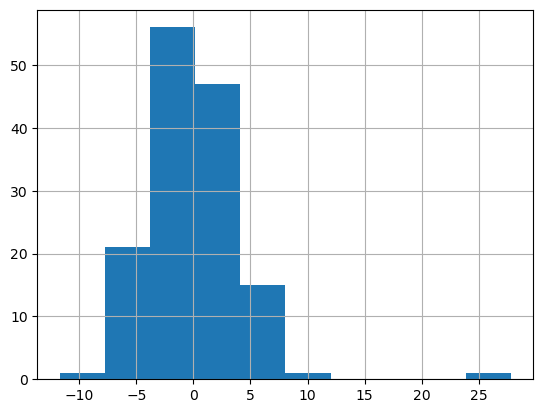

In [10]:
data['overall_score'].hist()

In [11]:
data[data['overall_score'] >= 10]

workloc  workleng  manag_resp  involved  autonomy  direct_manag  \
0         1         3           0  3.195169  3.879956      1.343400   
12        1         3           0  1.510066  1.157852      1.053927   

    integrated   welfare  training  work_press  reflexive  innovative  \
0     4.920832  2.623486  4.476097    3.903101   2.996662   -2.256064   
12    1.119790  0.556717  2.083603   -0.129833   1.012858    1.120106   

    customers  overall_score  intent_quit  sentiment  
0    2.736050          27.82            1          2  
12   0.910302          10.40            2          2

> As there is only one observation seems to have particularly scores (> ~10 points) for most of the areas, making the overall_scores high. Keeping this observation may not represent the majority of the sample.
> Thus, I will remove this observation from the data set.

In [12]:
data.drop(data[data['overall_score'] >= 25].index, inplace=True)
#Note-to-self: when the inplace function is use, the orifinal dataset is modified, so does not need to create a new variable to store the dataset

In [13]:
# Check the data shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 1 to 141
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   workloc        141 non-null    int64  
 1   workleng       141 non-null    int64  
 2   manag_resp     141 non-null    int64  
 3   involved       141 non-null    float64
 4   autonomy       141 non-null    float64
 5   direct_manag   141 non-null    float64
 6   integrated     141 non-null    float64
 7   welfare        141 non-null    float64
 8   training       141 non-null    float64
 9   work_press     141 non-null    float64
 10  reflexive      141 non-null    float64
 11  innovative     141 non-null    float64
 12  customers      141 non-null    float64
 13  overall_score  141 non-null    float64
 14  intent_quit    141 non-null    int64  
 15  sentiment      141 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 17.8 KB


#### c) Explore the data - compute descriptive analysis

Next, we'll compute the descriptive statistics with the `describe()` method.

Descriptive statistics provide a summary of the data. It helps to understand the data set and to determine whether the data needs more preprocessing steps. Let's compute the descriptive statistics with the `describe()` method.

In [14]:
# Compute descriptive analysis
data.describe().round(2)

workloc  workleng  manag_resp  involved  autonomy  direct_manag  \
count   141.00    141.00      141.00    141.00    141.00        141.00   
mean      0.67      9.63        0.26     -0.02     -0.03         -0.01   
std       0.47      4.57        0.44      0.97      0.95          1.00   
min       0.00      3.00        0.00     -3.55     -3.20         -3.00   
25%       0.00      8.00        0.00     -0.60     -0.48         -0.68   
50%       1.00      8.00        0.00     -0.18      0.07         -0.10   
75%       1.00     13.00        1.00      0.67      0.61          0.76   
max       1.00     23.00        1.00      1.51      2.25          1.34   

       integrated  welfare  training  work_press  reflexive  innovative  \
count      141.00   141.00    141.00      141.00     141.00      141.00   
mean        -0.03    -0.02     -0.03       -0.03      -0.02        0.02   
std          0.91     0.98      0.93        0.95       0.97        0.99   
min         -2.68    -3.06     -3.50       -3.59      -1.47       -2.63   
25%         -0.78    -0.48     -0.31       -0.71      -0.72       -0.76   
50%         -0.15     0.04     -0.31       -0.13       0.02       -0.01   
75%          0.49     0.56      0.49        0.45       0.52        0.74   
max          2.39     2.62      2.88        2.75       3.00        1.50   

       customers  overall_score  intent_quit  sentiment  
count     141.00         141.00       141.00     141.00  
mean       -0.02          -0.20         1.99       1.75  
std         0.98           3.44         0.93       0.85  
min        -2.74         -11.68         1.00       1.00  
25%        -0.55          -2.52         1.00       1.00  
50%         0.18          -0.28         2.00       1.00  
75%         0.55           2.44         3.00       3.00  
max         2.37          10.40         3.00       3.00

>The output indicates that there are 142 values in each column. Let’s explore the column together with the knowledge from the metadata file:
> - Demographic information
    - 1) working location: 67% of staff working remotely.
    - 2) Working length: mean=10, which means staff have the average 10 years working at ServiceFirst.
    - 3) Managerial responsibility: more than a quarter (26%) of the sample have managerial responsibility.

> - Organisational climate variables:
    - We can see the general statistics but I will describe them in the next step after plotting them.

> - Overall satisfaction has both mean and median values are approx. -0.20

> - Intention to quit has mean of 1.98, which means they highly want to leave the oragnisation. 

> - Sentiment variable: my understanding this is generated from a sentiment analysis of staff's textual responses. We can see the mean is `1.75`, which is in the negative side

##### Organisational climate factors

Next, I want to have a general understanding of how staff rated 10 areas of focus regarding organisational climate in the company. I will create a boxplot to intepret these variables together with the descriptive info results generated above.

In [15]:
data.columns

Index(['workloc', 'workleng', 'manag_resp', 'involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'work_press',
       'reflexive', 'innovative', 'customers', 'overall_score', 'intent_quit',
       'sentiment'],
      dtype='object')

In [16]:
# Make a list of 
org_climate = ['involved', 'autonomy', 'direct_manag', 'integrated', 
                    'welfare', 'training', 'work_press',
                    'reflexive', 'innovative', 'customers']

In [17]:
type(org_climate)

list

In [18]:
data[org_climate]

involved  autonomy  direct_manag  integrated   welfare  training  \
1   -1.017589  0.613432      1.053927   -0.147223  1.073410 -1.106388   
2    1.510066  0.613432     -2.419751    0.486283  0.040025 -0.308890   
3    1.088790 -0.475410     -1.551332   -0.780730 -1.510051 -1.106388   
4   -0.596313 -1.564251     -0.393439   -0.147223  0.040025  0.488608   
5    0.246239  0.613432      1.053927    0.486283  0.556717 -0.308890   
..        ...       ...           ...         ...       ...       ...   
137 -3.545243 -1.019830     -0.103966    0.486283 -0.993359  0.488608   
138 -1.438864  0.613432     -2.419751   -1.414237 -0.993359  0.488608   
139  1.510066  0.069011     -0.393439    0.486283 -1.510051 -0.308890   
140 -0.175037  1.157852      1.343400    0.486283  0.556717 -0.308890   
141 -1.017589  0.613432     -0.103966    1.119790  0.040025 -1.106388   

     work_press  reflexive  innovative  customers  
1     -0.705966   2.004760   -1.880934  -1.645745  
2      1.598567  -1.466898    0.744976   2.370901  
3     -0.129833  -1.218922    1.120106  -0.550296  
4     -0.129833   0.268931    0.744976  -1.280595  
5     -0.705966  -0.474995   -1.880934  -0.550296  
..          ...        ...         ...        ...  
137    0.446301  -1.218922   -0.380414   0.910302  
138    0.446301  -0.227020   -0.380414   0.910302  
139   -0.129833  -1.218922    1.120106   1.640602  
140   -0.705966  -0.722971    1.120106   0.545153  
141    0.446301   0.268931   -0.005284   0.545153  

[141 rows x 10 columns]

       involved  autonomy  direct_manag  integrated  welfare  training  \
count    141.00    141.00        141.00      141.00   141.00    141.00   
mean      -0.02     -0.03         -0.01       -0.03    -0.02     -0.03   
std        0.97      0.95          1.00        0.91     0.98      0.93   
min       -3.55     -3.20         -3.00       -2.68    -3.06     -3.50   
25%       -0.60     -0.48         -0.68       -0.78    -0.48     -0.31   
50%       -0.18      0.07         -0.10       -0.15     0.04     -0.31   
75%        0.67      0.61          0.76        0.49     0.56      0.49   
max        1.51      2.25          1.34        2.39     2.62      2.88   

       work_press  reflexive  innovative  customers  
count      141.00     141.00      141.00     141.00  
mean        -0.03      -0.02        0.02      -0.02  
std          0.95       0.97        0.99       0.98  
min         -3.59      -1.47       -2.63      -2.74  
25%         -0.71      -0.72       -0.76      -0.55  
50%      

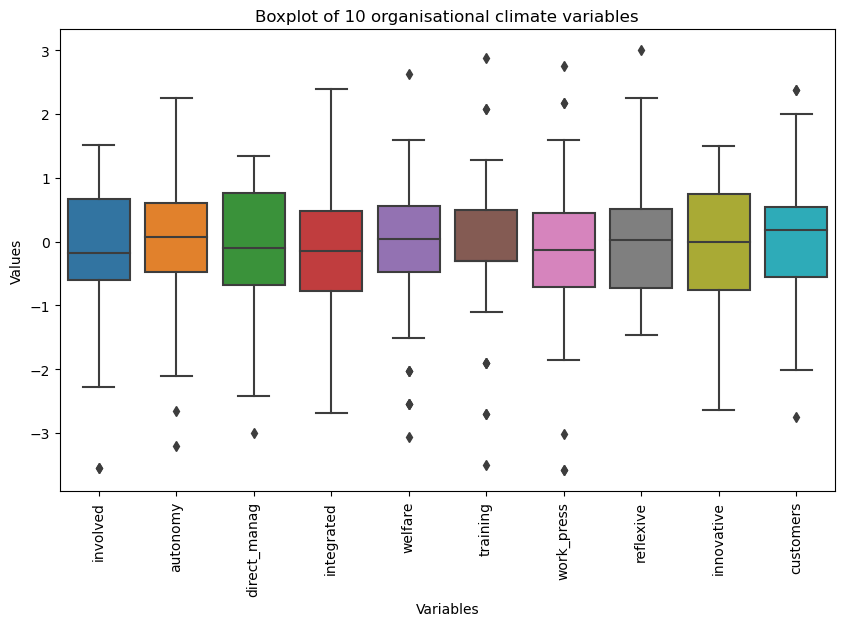

In [19]:
#  Make a list of selected the columns of interest
org_climate = ['involved', 'autonomy', 'direct_manag', 'integrated', 
                    'welfare', 'training', 'work_press',
                    'reflexive', 'innovative', 'customers']

# Print descriptive statistics and visualise them for interested variables
print(data[org_climate].describe().round(2))


# Create one graph, with boxplots representing each column.

# Import the necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns


# Set the figsize before creating the plot
plt.figure(figsize=(10, 6))

# Create the boxplot using seaborn
sns.boxplot(data=data[org_climate])

# Customize the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Variables')  # Set x-axis label
plt.ylabel('Values')  # Set y-axis label
plt.title('Boxplot of 10 organisational climate variables')  # Set plot title
plt.show()  # Display the plot


> Based on the variables' descriptive statistics and their boxplots, we can see the following:
> - Ten organisational climate variables have the means ranging from **-0.03** (`autonomy`, `integrated`, `training`, `work_press`) to **0.02** `(direct_manag)` - this is also the only area that has positive score.
>   - `customer`, `innovative` have higher mean scores.
>   - `involved`, `welfare`, `reflexive`,  are rated in the middle range (2.34, 2.61 and 2.54 respectively).
>   - `involved`, `intergrated`, `traning`, `innovative` were rated lower scores

> Looking at the boxplot, we can use median values when there are outliers.
>  -`customer`, `autonomy`, `welfare`, `reflexive`, `innovative` have higher medians
>  - `involved`, `direct_manag`, `integrated`, `work_press`, `traning` have lower median values


I create a `overall_hue` variable which is ordinal so that we can add in the hue and see how other variables look together with `overall_hue`

In [20]:
# Create a tranformed overall_score for hue argument
import numpy as np

def recode_overall(score):
    if score < -2.52:
        return '1-low'
    elif -2.52 <= score < -0.28:
        return '2-medium_low'
    elif -0.28 <= score < 2.44:
        return '3-medium_high'
    else:
        return '4-high'
    
# apply the recode function to create new varialbe
data['overall_hue'] = np.vectorize(recode_overall)(data['overall_score'])

In [21]:
data['overall_hue'].value_counts()

4-high           36
2-medium_low     35
1-low            35
3-medium_high    35
Name: overall_hue, dtype: int64

In [22]:
# Define the desired order of hue categories
hue_order = ['1-low', '2-medium_low', '3-medium_high', '4-high']

# Convert 'overall_hue' to an ordered categorical data type with the desired order
data['overall_hue'] = pd.Categorical(data['overall_hue'], categories=hue_order, ordered=True)

Create pairplot to examine the relationships between variables

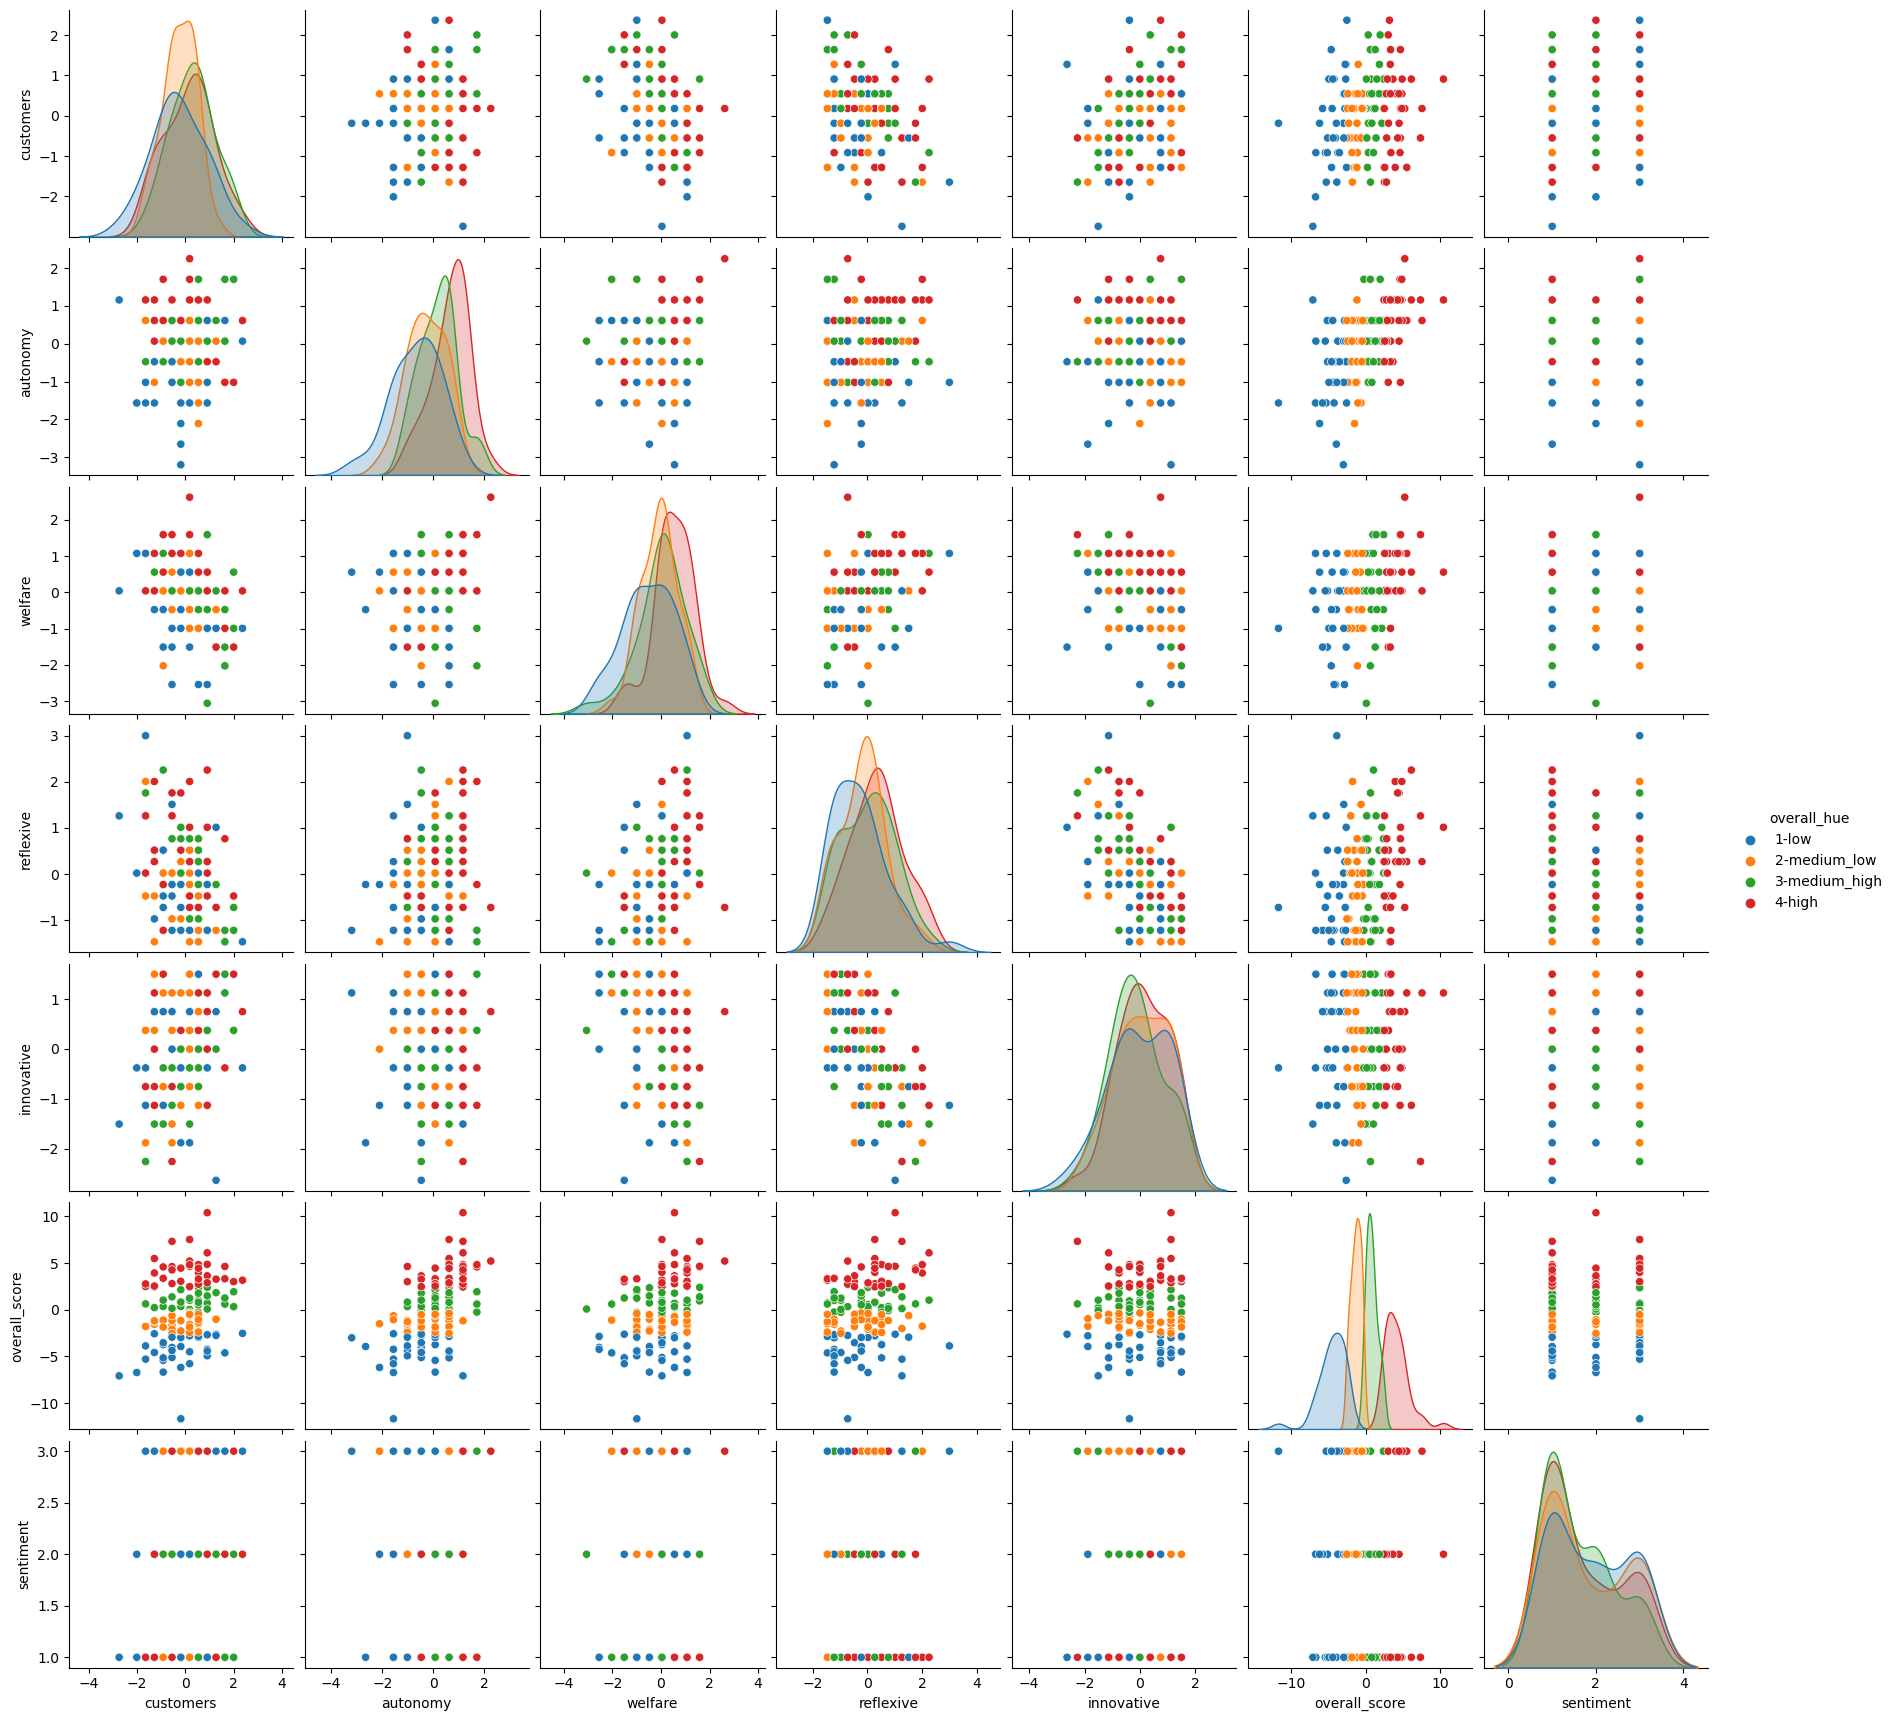

In [23]:
# Creata pairplot of interested variables
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create columns to plot
cols_to_plot = ['customers', 'autonomy', 'welfare', 'reflexive', 'innovative', 'overall_score', 'sentiment', 'overall_hue']

# Plot with pairplot function in seaborn
sns.pairplot(data[cols_to_plot], hue='overall_hue'), #diag_kind='kde') #kind='reg', plot_kws={'line_kws':{'color':'red'}}, add this if want to add a regression line

plt.show()

> `overall_score` seems to have strong linear relationships with: 'customers', 'autonomy', 'reflexive'

(<seaborn.axisgrid.PairGrid at 0x2227cc49a90>,)

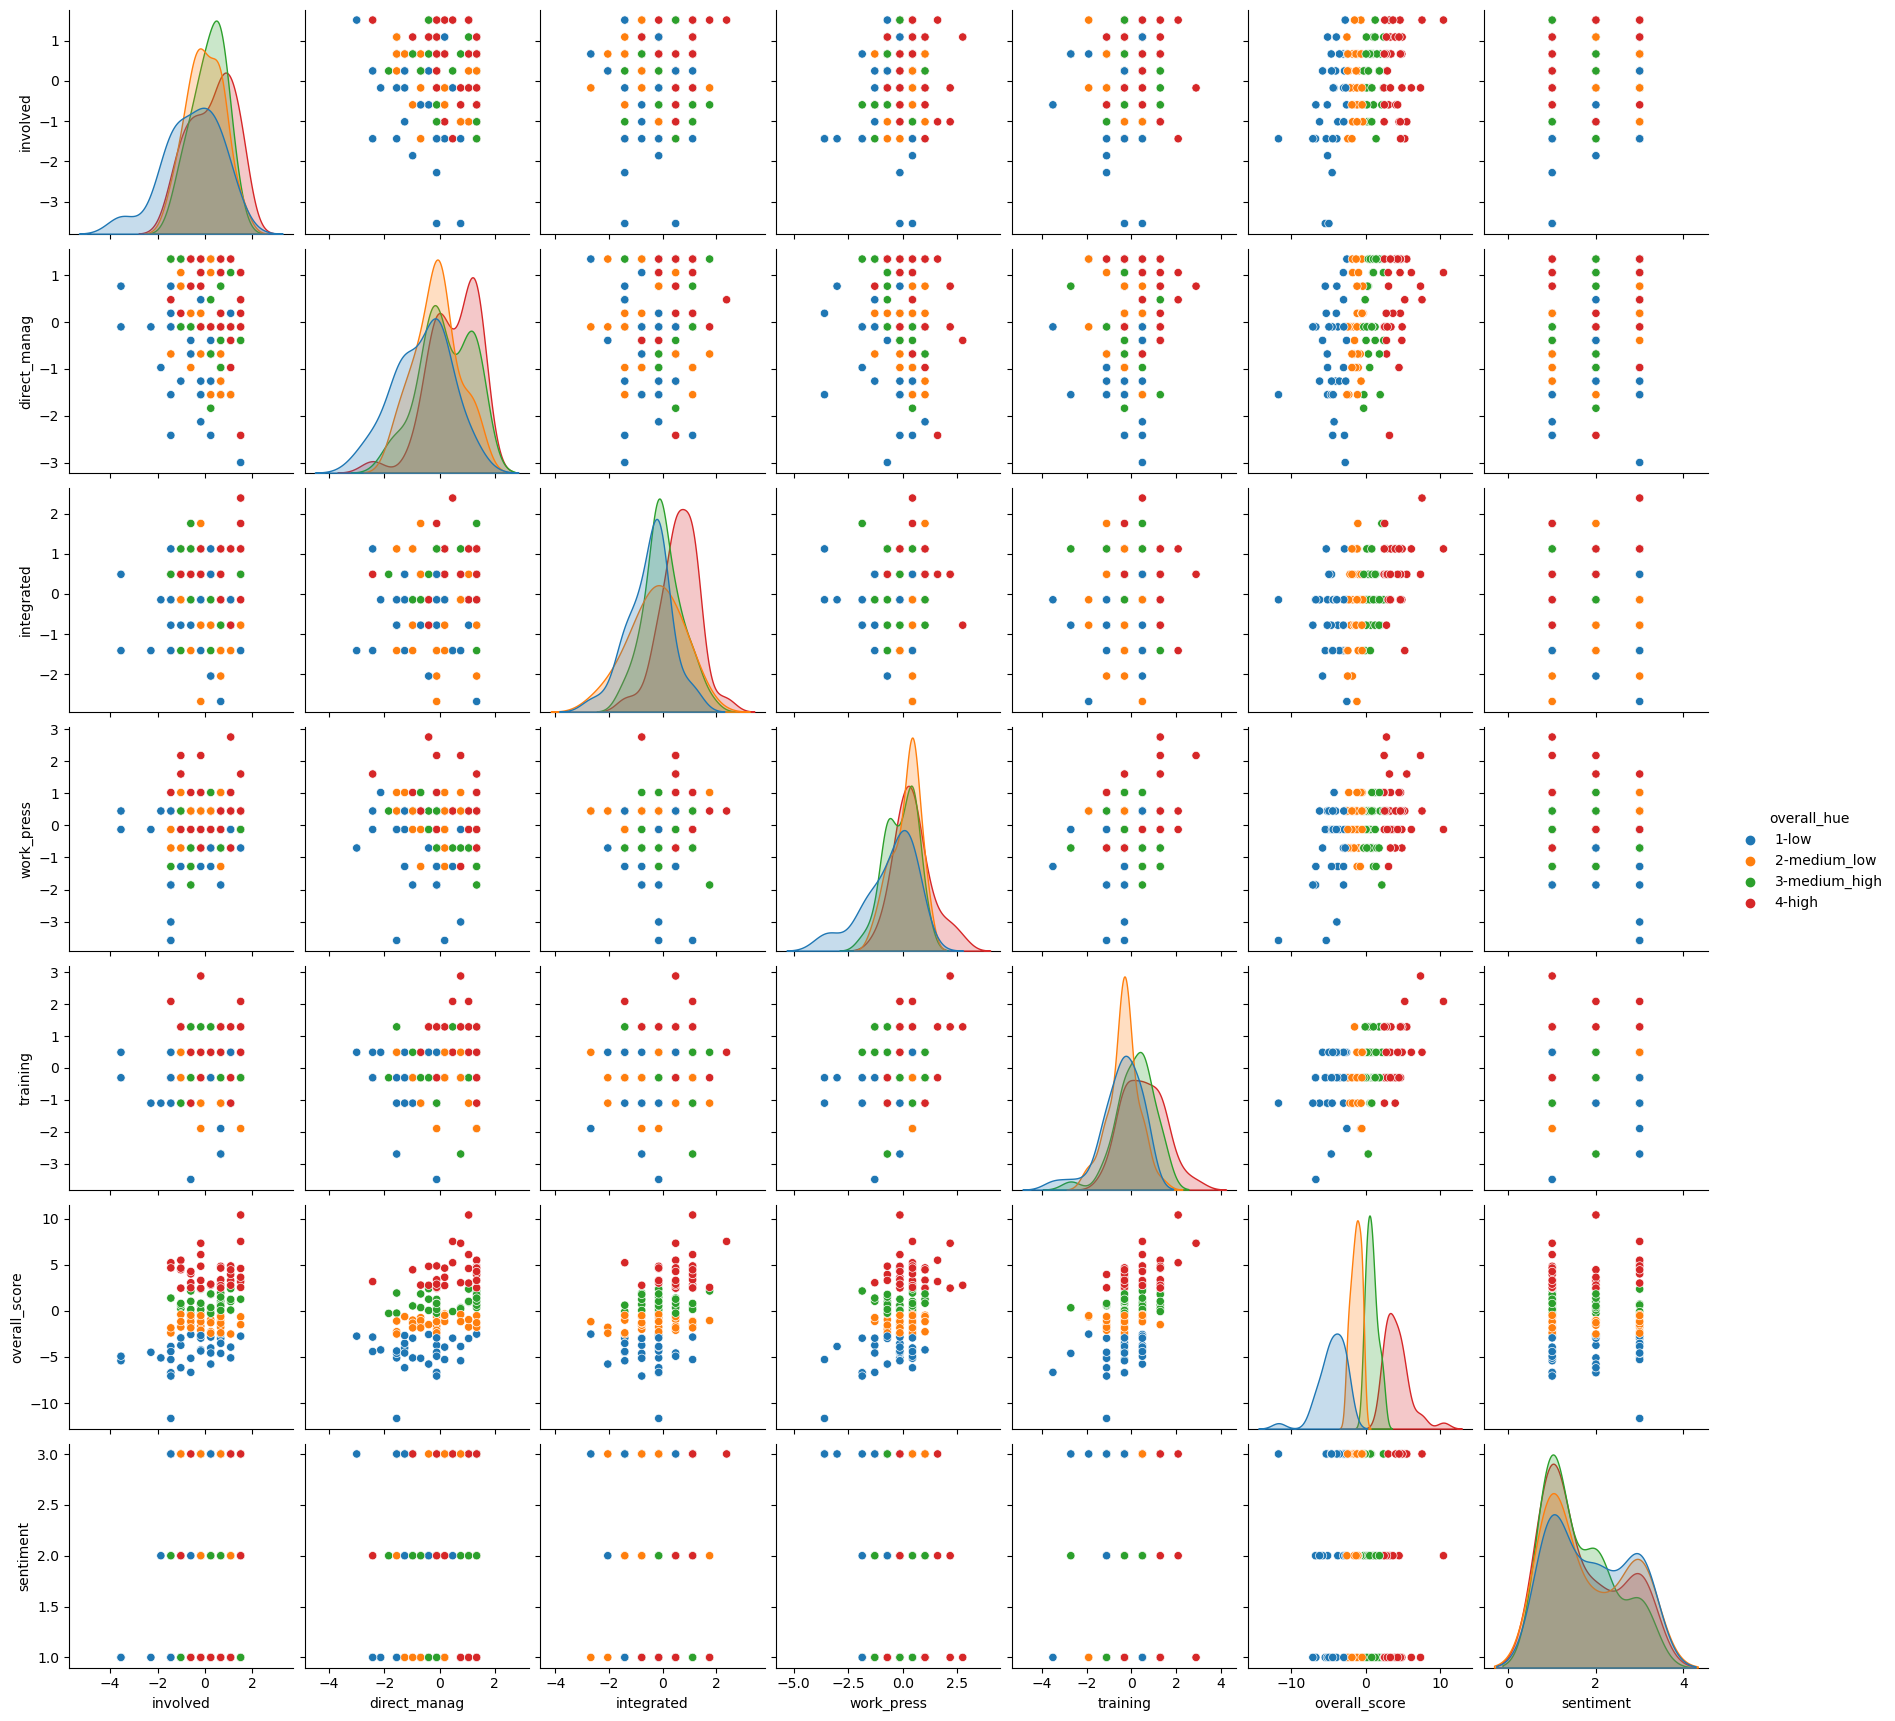

In [24]:
# Creata pairplot of interested variables
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create columns to plot
cols_to_plot = ['involved', 'direct_manag', 'integrated', 'work_press', 'training', 'overall_score', 'sentiment', 'overall_hue']

# Plot with pairplot function in seaborn
sns.pairplot(data[cols_to_plot], hue='overall_hue'), #diag_kind='kde') #kind='reg', plot_kws={'line_kws':{'color':'red'}}, add this if want to add a regression line

> `overall_score` seems to have strong linear relationships with: 'integrated', 'training'.
> Interestingly, higher 'training' seems to correlate with higher 'work_press' and higher 'overall_score'

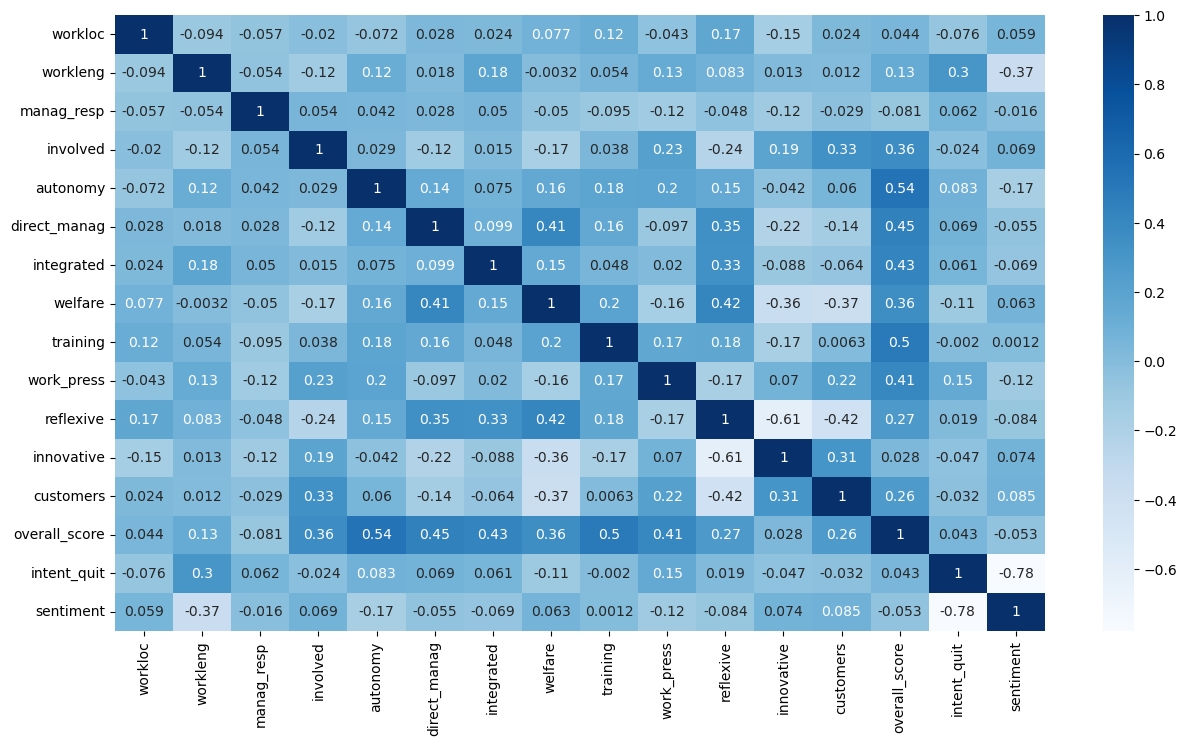

In [25]:
# Create a correlation matrix to determine possible multicollinearity.
# Import the necessary library.
import matplotlib.pyplot as plt
import seaborn as sns

# Check the correlation with a heatmap.
plt.figure(figsize=(15, 8)) # adjust the size as needed
sns.heatmap(data.corr(),
            annot=True,
            cmap='Blues')

# Show the plot
plt.show()

# 4. Modelling

In this section, we will explore the business questions using three machine learning models, as follows: 
        
        4.1. K-mean clustering to see if there are homogeneous groups amongst staff who have different different satisfaction. Thus, we can analyse what form the groups.
        4.2. Decision tree including both regression and classification
        4.3. Sentiment analysis

## 4.1. K-mean clustering

The objective is to explore the relationship between the focal areas and overall_score.

We will follow the below steps:
- Step 1: Prepare the data
- Step 2: Scaling the data
- Step 3: Visualise the data
- Step 4: Determine the k-value
- Step 5: Evaluate and visualise the clusters
- Step 6: Share the findings

### 1. Prepare the data

In [26]:
# Create a new data set with needed variables for the model
df_cluster = data[['workloc', 'workleng', 'manag_resp', 'involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'reflexive',
       'innovative', 'customers', 'work_press', 'overall_score', 'overall_hue']]

# View the data
print(df_cluster.info())
print(df_cluster.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 1 to 141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   workloc        141 non-null    int64   
 1   workleng       141 non-null    int64   
 2   manag_resp     141 non-null    int64   
 3   involved       141 non-null    float64 
 4   autonomy       141 non-null    float64 
 5   direct_manag   141 non-null    float64 
 6   integrated     141 non-null    float64 
 7   welfare        141 non-null    float64 
 8   training       141 non-null    float64 
 9   reflexive      141 non-null    float64 
 10  innovative     141 non-null    float64 
 11  customers      141 non-null    float64 
 12  work_press     141 non-null    float64 
 13  overall_score  141 non-null    float64 
 14  overall_hue    141 non-null    category
dtypes: category(1), float64(11), int64(3)
memory usage: 15.9 KB
None
       workloc  workleng  manag_resp  involved  autonomy  di

### 2. Scaling the data
This dataset does not need scaling because the score for 10 areas are already standadised scores. We can confirm this by examining the standard deviation (they are all approximately equal to 1)

If we need to do scaling. The below code is used for standardise:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### 3. Visualise the data

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<function matplotlib.pyplot.show(close=None, block=None)>

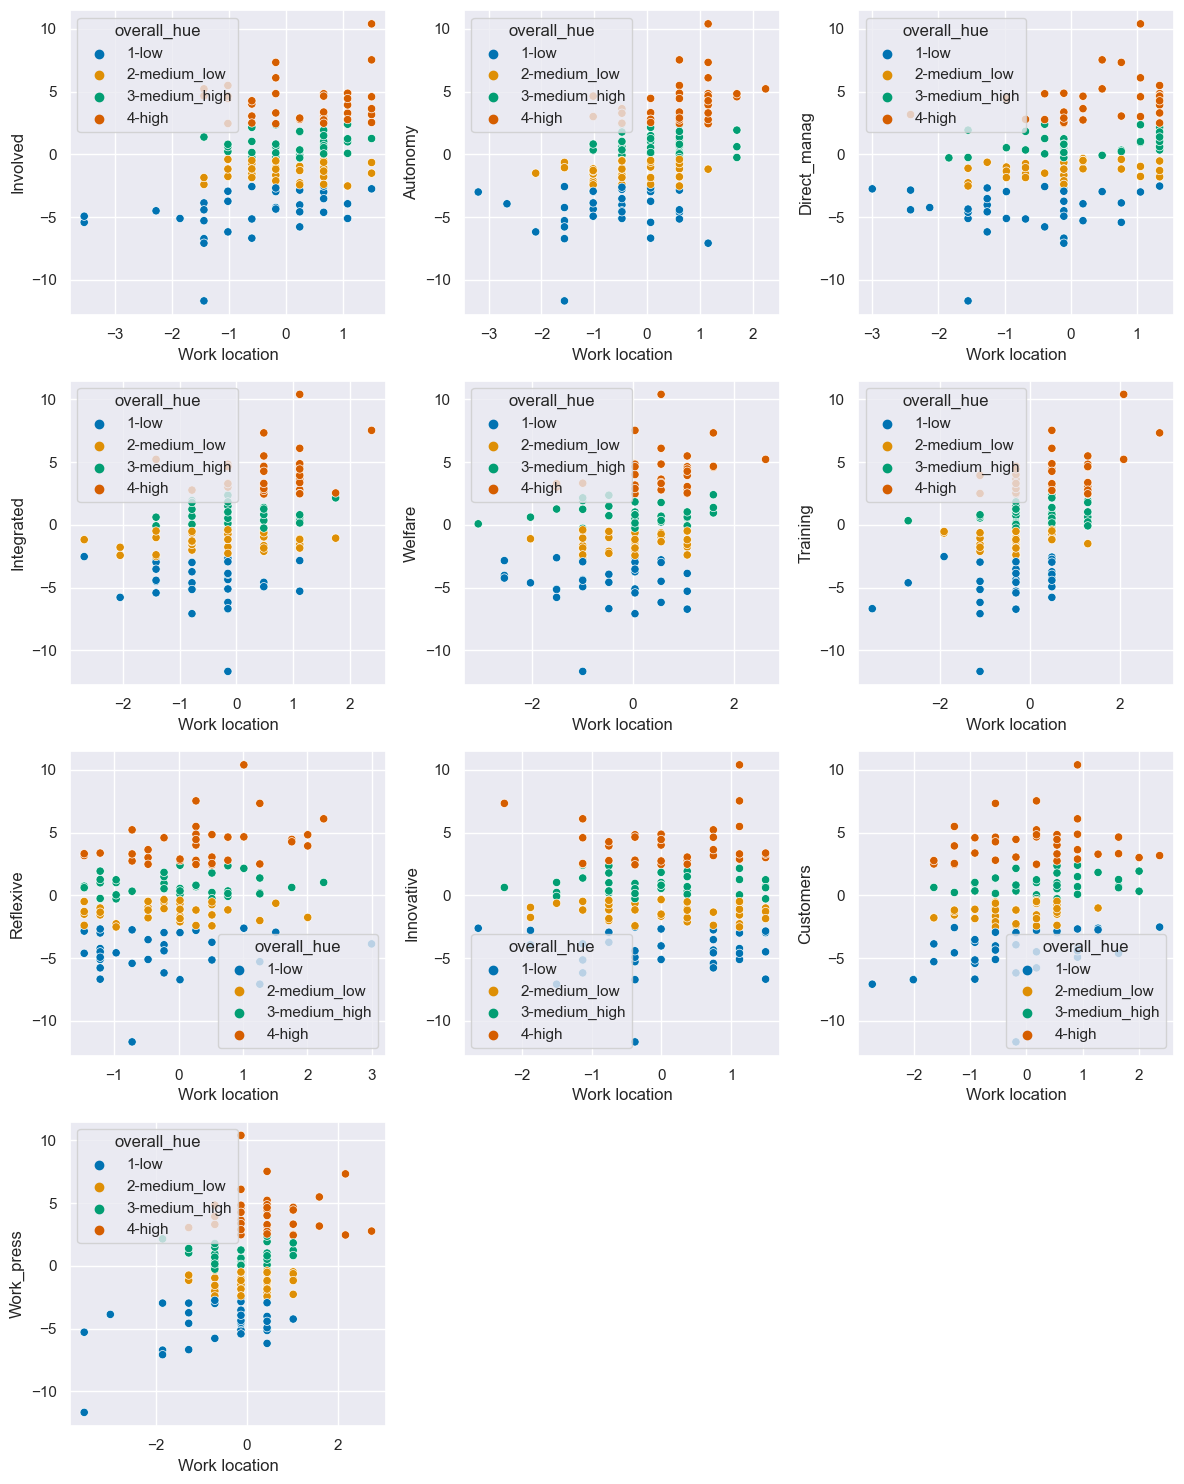

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(12,15))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# List of focal areas to create subplots for
focal_areas = ['involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'reflexive',
       'innovative', 'customers', 'work_press']

# Iterate over the subplots and create a scatter plot for each focal area
for i, focal_area in enumerate(focal_areas):
    sns.scatterplot(data=df_cluster, x=focal_area, y='overall_score', hue='overall_hue', 
                palette='colorblind', ax=axes[i])
    axes[i].set_xlabel('Work location')
    axes[i].set_ylabel(focal_area.capitalize())
    
# Remove any extra subplots if the number of focal is less than 12
if len(focal_area) < 12:
    for j in range(len(focal_areas), 12):
        fig.delaxes(axes[j])
        
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show

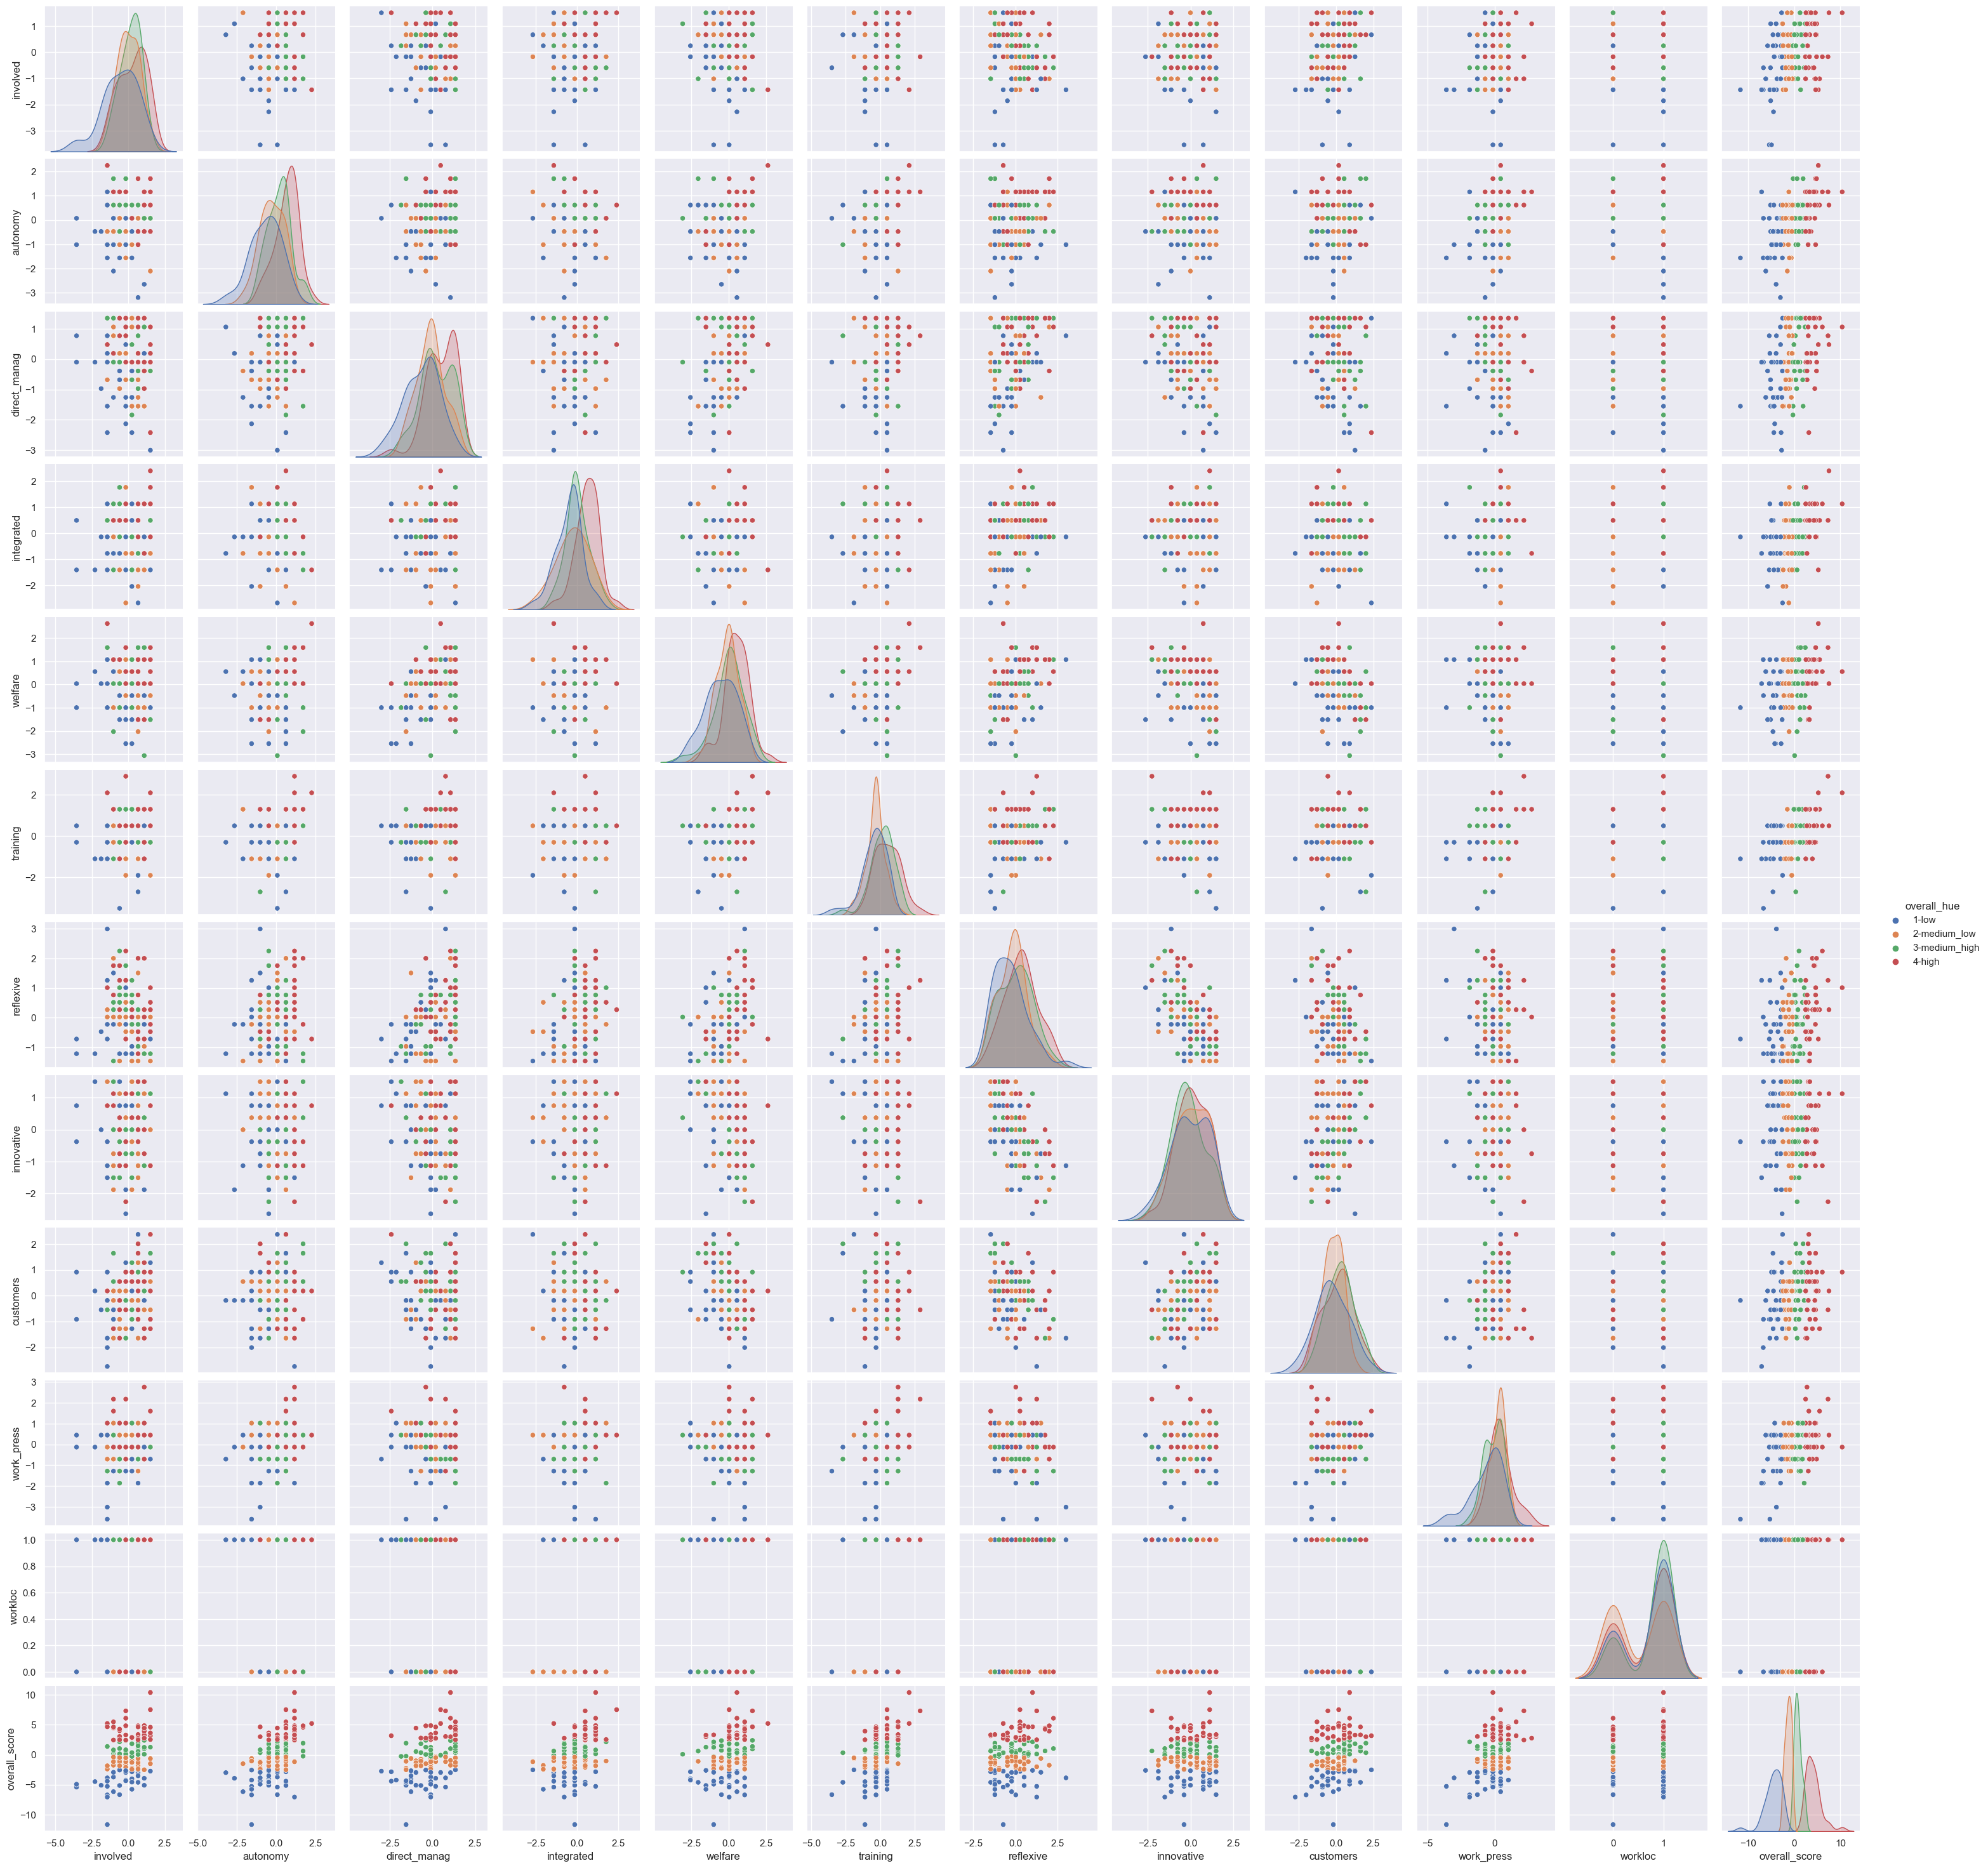

In [29]:
# Create pairplot
cols_to_plot =   ['involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'reflexive',
       'innovative', 'customers', 'work_press', 'workloc', 'overall_score', 'overall_hue']
sns.pairplot(df_cluster[cols_to_plot], hue='overall_hue', diag_kind='kde')

# Display the plot
#plt.show()

#### Specify the variables for clustering

In [30]:
X1 = df_cluster[['autonomy', 'training', 'direct_manag', 'integrated', 'work_press', 'overall_score']]
X1

autonomy  training  direct_manag  integrated  work_press  overall_score
1    0.613432 -1.106388      1.053927   -0.147223   -0.705966          -1.76
2    0.613432 -0.308890     -2.419751    0.486283    1.598567           3.17
3   -0.475410 -1.106388     -1.551332   -0.780730   -0.129833          -5.11
4   -1.564251  0.488608     -0.393439   -0.147223   -0.129833          -2.57
5    0.613432 -0.308890      1.053927    0.486283   -0.705966          -0.96
..        ...       ...           ...         ...         ...            ...
137 -1.019830  0.488608     -0.103966    0.486283    0.446301          -4.93
138  0.613432  0.488608     -2.419751   -1.414237    0.446301          -4.42
139  0.069011 -0.308890     -0.393439    0.486283   -0.129833           1.26
140  1.157852 -0.308890      1.343400    0.486283   -0.705966           3.30
141  0.613432 -1.106388     -0.103966    1.119790    0.446301           0.80

[141 rows x 6 columns]

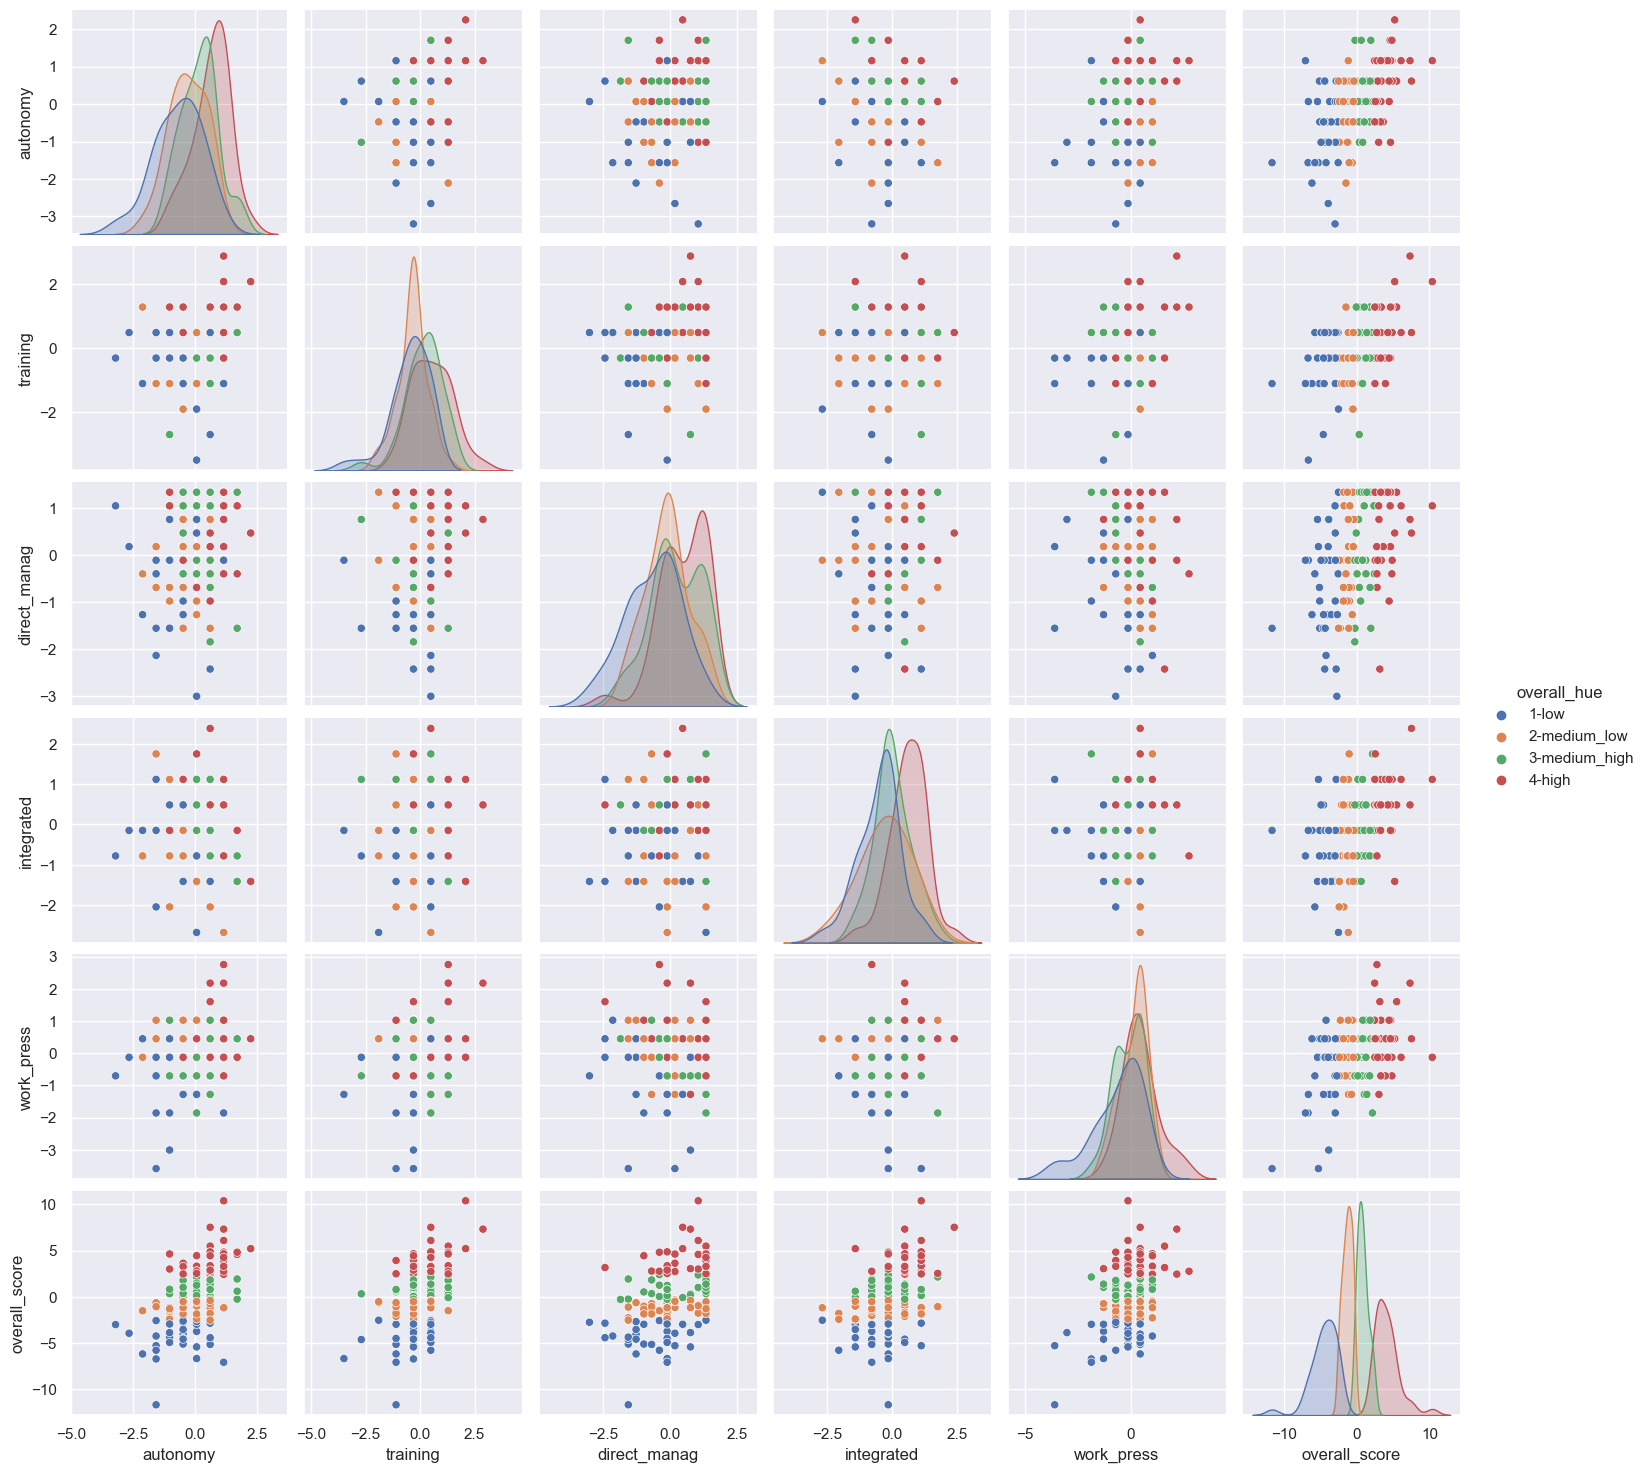

In [31]:
# Create pairplot
cols_to_plot = ['autonomy', 'training', 'direct_manag', 'integrated', 'work_press', 'overall_score', 'overall_hue']
sns.pairplot(df_cluster[cols_to_plot], hue='overall_hue', diag_kind='kde')

# Display the plot
plt.show()

### 4: Determine the k-value

#### a) Elbow method

Text(0, 0.5, 'WCSS')

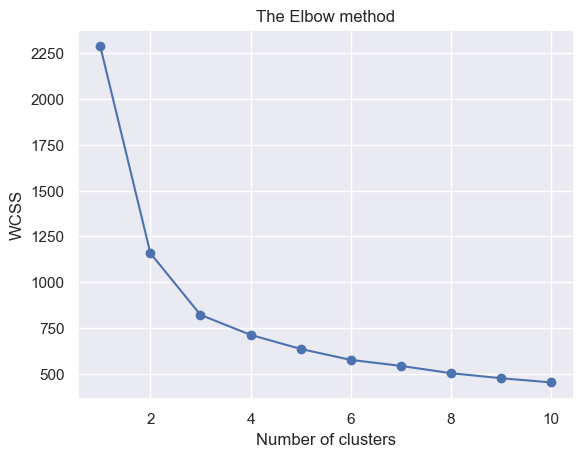

In [32]:
# Import the Kmeans class
from sklearn.cluster import KMeans

# Elbow chart for us to decide on the number of optimal clusters
# Default options: init='k-means++', max_iter=300, and n_init=10

elbow = [] # create an empty list
for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++', #the default option
                   max_iter=300,
                   n_init=25,
                   random_state=1234)
    kmeans.fit(X1)
    elbow.append(kmeans.inertia_) # inertia calculates sum of squared of items
    
# Plot the elbow method
plt.plot(range(1, 11),
        elbow,
        marker='o')

# Insert labels and title
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

> Comments: Looks like there are two or three clusters identified based on the inflection curve.

#### b) Silhouette method

In [ ]:
# Import Silhouette_score class from sklearn
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used with the silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k,
                      init='k-means++',
                      n_init=25,
                      random_state=1234)
    kmeans_s.fit(X1)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X1,
                               labels,
                               metric='euclidean'))

# Plot the silhouette method
plt.plot(range(2, kmax+1),
        sil,
        marker='o')

# Insert labels and title
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')

plt.show()

### 5: Evaluate and visualise clusters

#### a) `k=2` based on the elbow and silhouette method

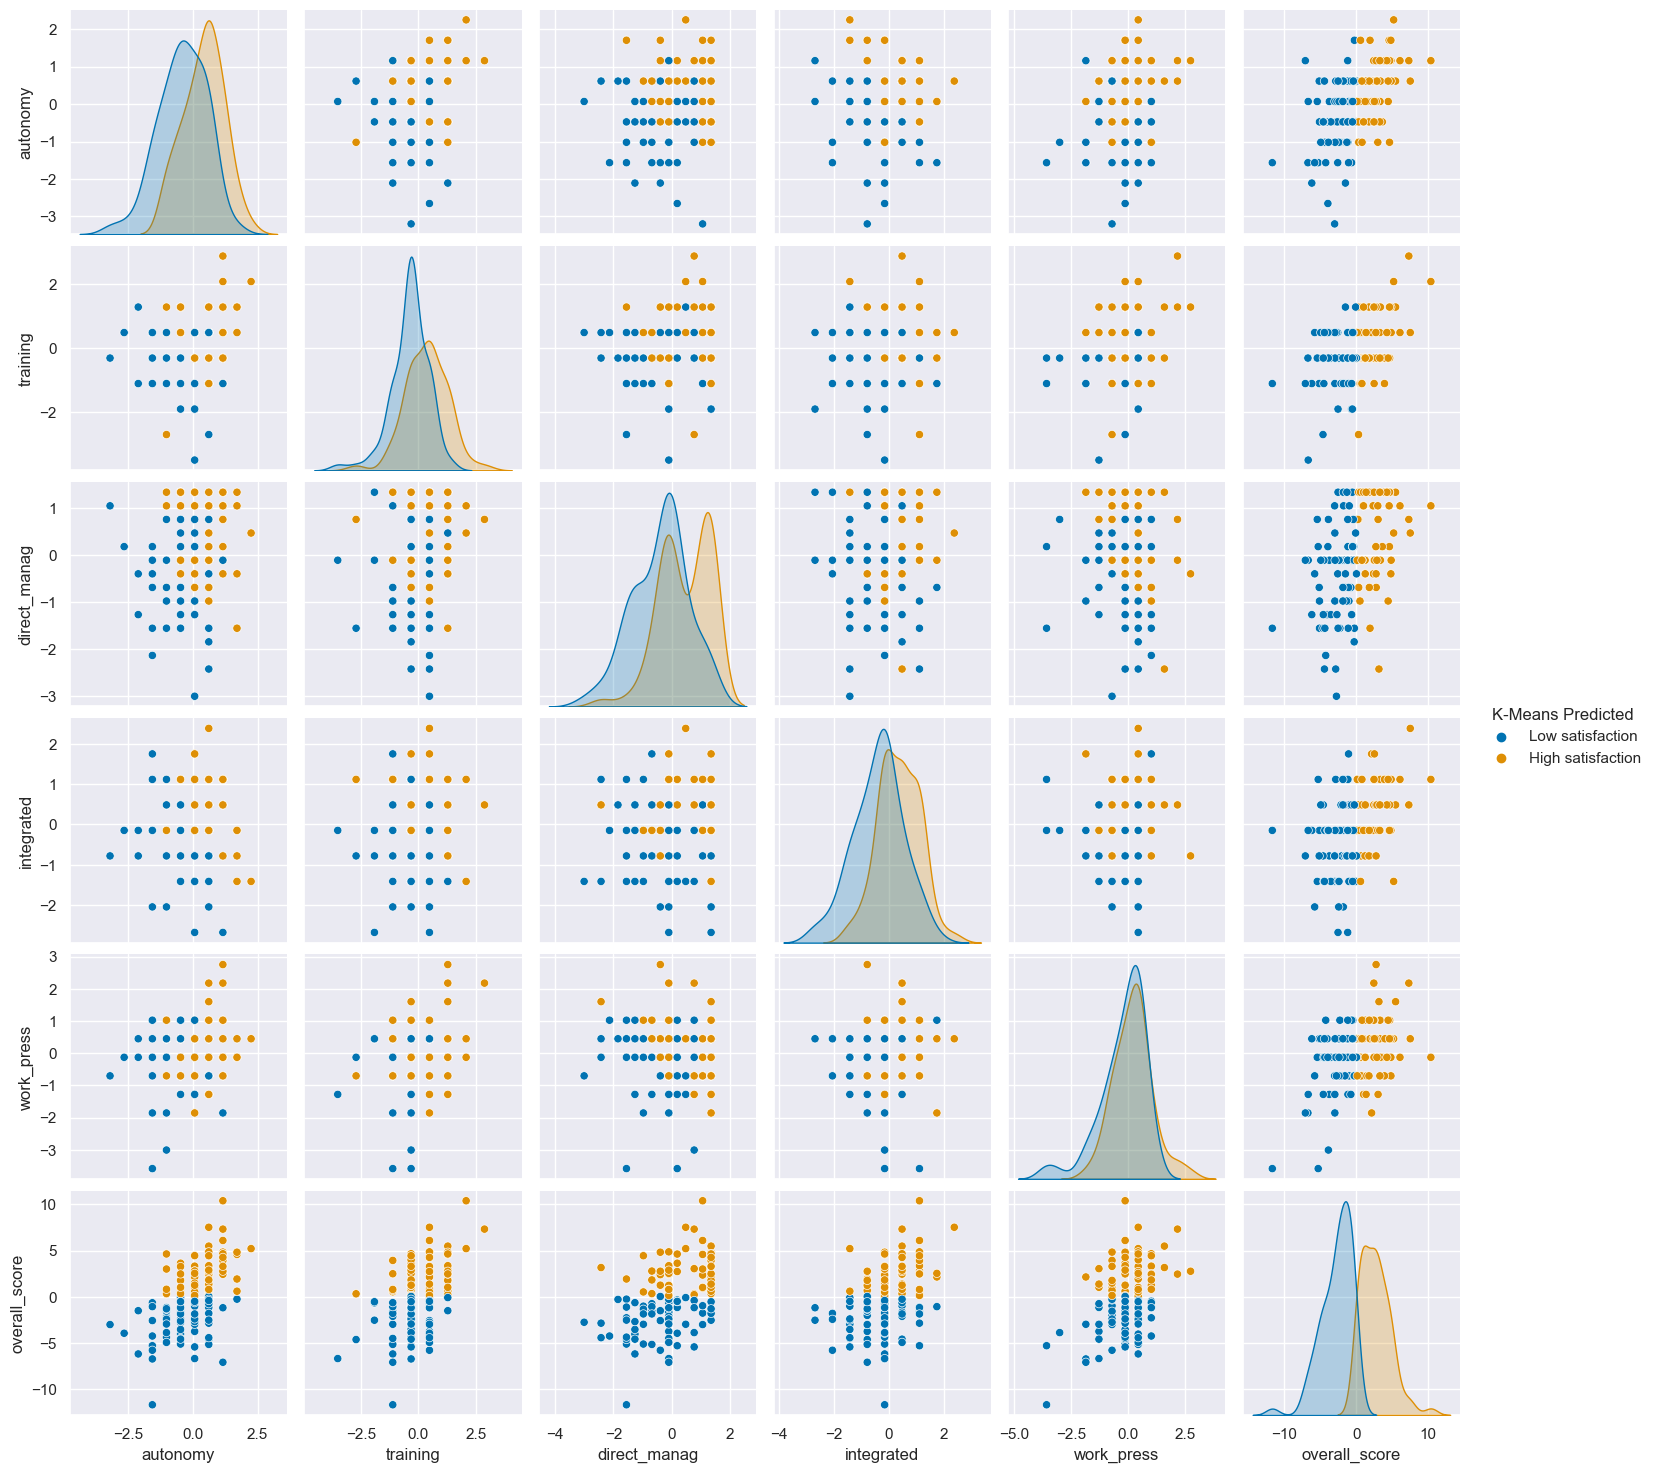

In [34]:
kmeans = KMeans(n_clusters=2,
                      init='k-means++',
                      n_init=25,
                      random_state=1234).fit(X1)

X1['K-Means Predicted'] = kmeans.labels_ 

# Assign custom labels to the clusters
X1['K-Means Predicted'] = X1['K-Means Predicted'].map({0: 'Low satisfaction', 1: 'High satisfaction'})

# Plot the predicted
sns.pairplot(X1,
            hue='K-Means Predicted', 
            palette='colorblind',
            diag_kind='kde')

In [35]:
pip install plotly==5.15.0

Note: you may need to restart the kernel to use updated packages.


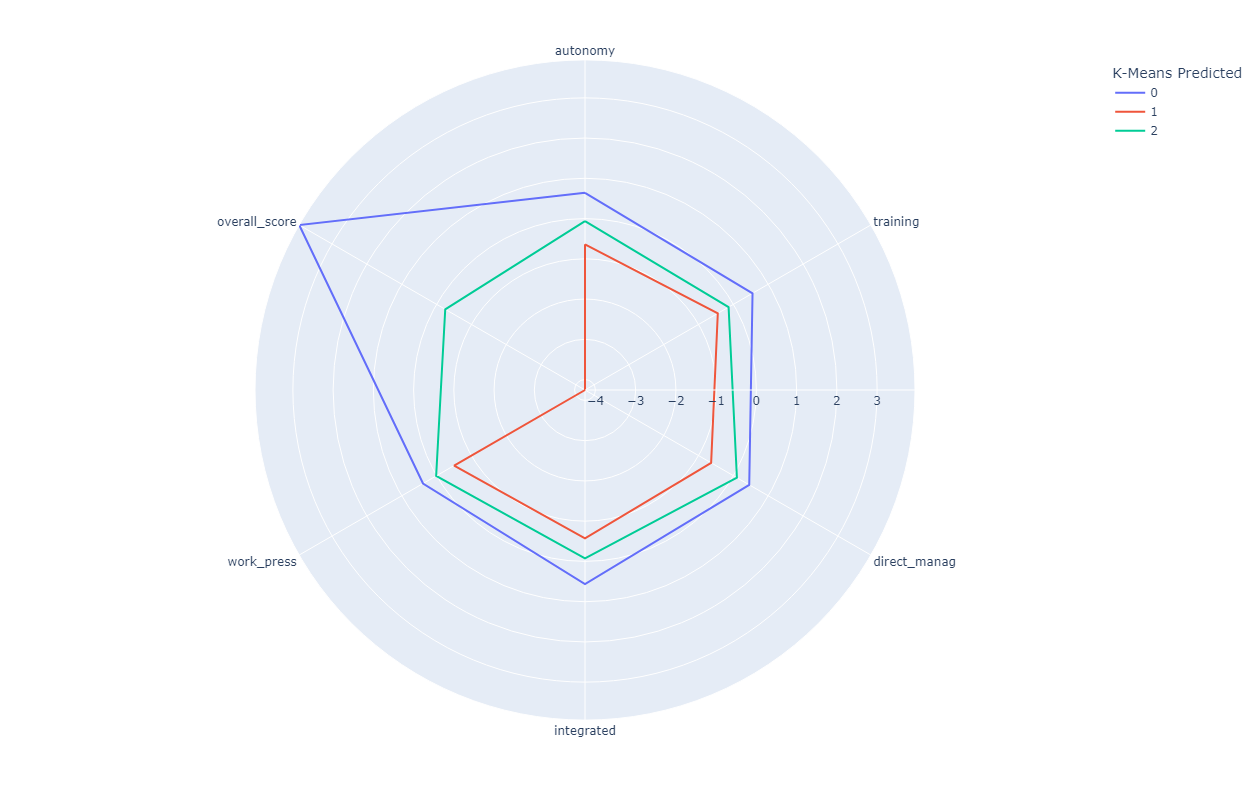

In [71]:
import plotly.express as px

polar=X1.groupby('K-Means Predicted').mean().reset_index()
polar=pd.melt(polar,id_vars=['K-Means Predicted'])
fig1 = px.line_polar(polar, r='value', theta='variable', color='K-Means Predicted',
                     line_close=True,height=800,width=1400)
fig1.show()

In [100]:
# Check the number of observations per predicted class.
X1['K-Means Predicted'].value_counts()

2    61
0    40
1    40
Name: K-Means Predicted, dtype: int64

#### b) `k=3` based on the elbow and silhouett method

In [101]:
X1.drop('K-Means Predicted', axis=1, inplace=True)
X1

autonomy  training  direct_manag  integrated  work_press  overall_score
1    0.613432 -1.106388      1.053927   -0.147223   -0.705966          -1.76
2    0.613432 -0.308890     -2.419751    0.486283    1.598567           3.17
3   -0.475410 -1.106388     -1.551332   -0.780730   -0.129833          -5.11
4   -1.564251  0.488608     -0.393439   -0.147223   -0.129833          -2.57
5    0.613432 -0.308890      1.053927    0.486283   -0.705966          -0.96
..        ...       ...           ...         ...         ...            ...
137 -1.019830  0.488608     -0.103966    0.486283    0.446301          -4.93
138  0.613432  0.488608     -2.419751   -1.414237    0.446301          -4.42
139  0.069011 -0.308890     -0.393439    0.486283   -0.129833           1.26
140  1.157852 -0.308890      1.343400    0.486283   -0.705966           3.30
141  0.613432 -1.106388     -0.103966    1.119790    0.446301           0.80

[141 rows x 6 columns]

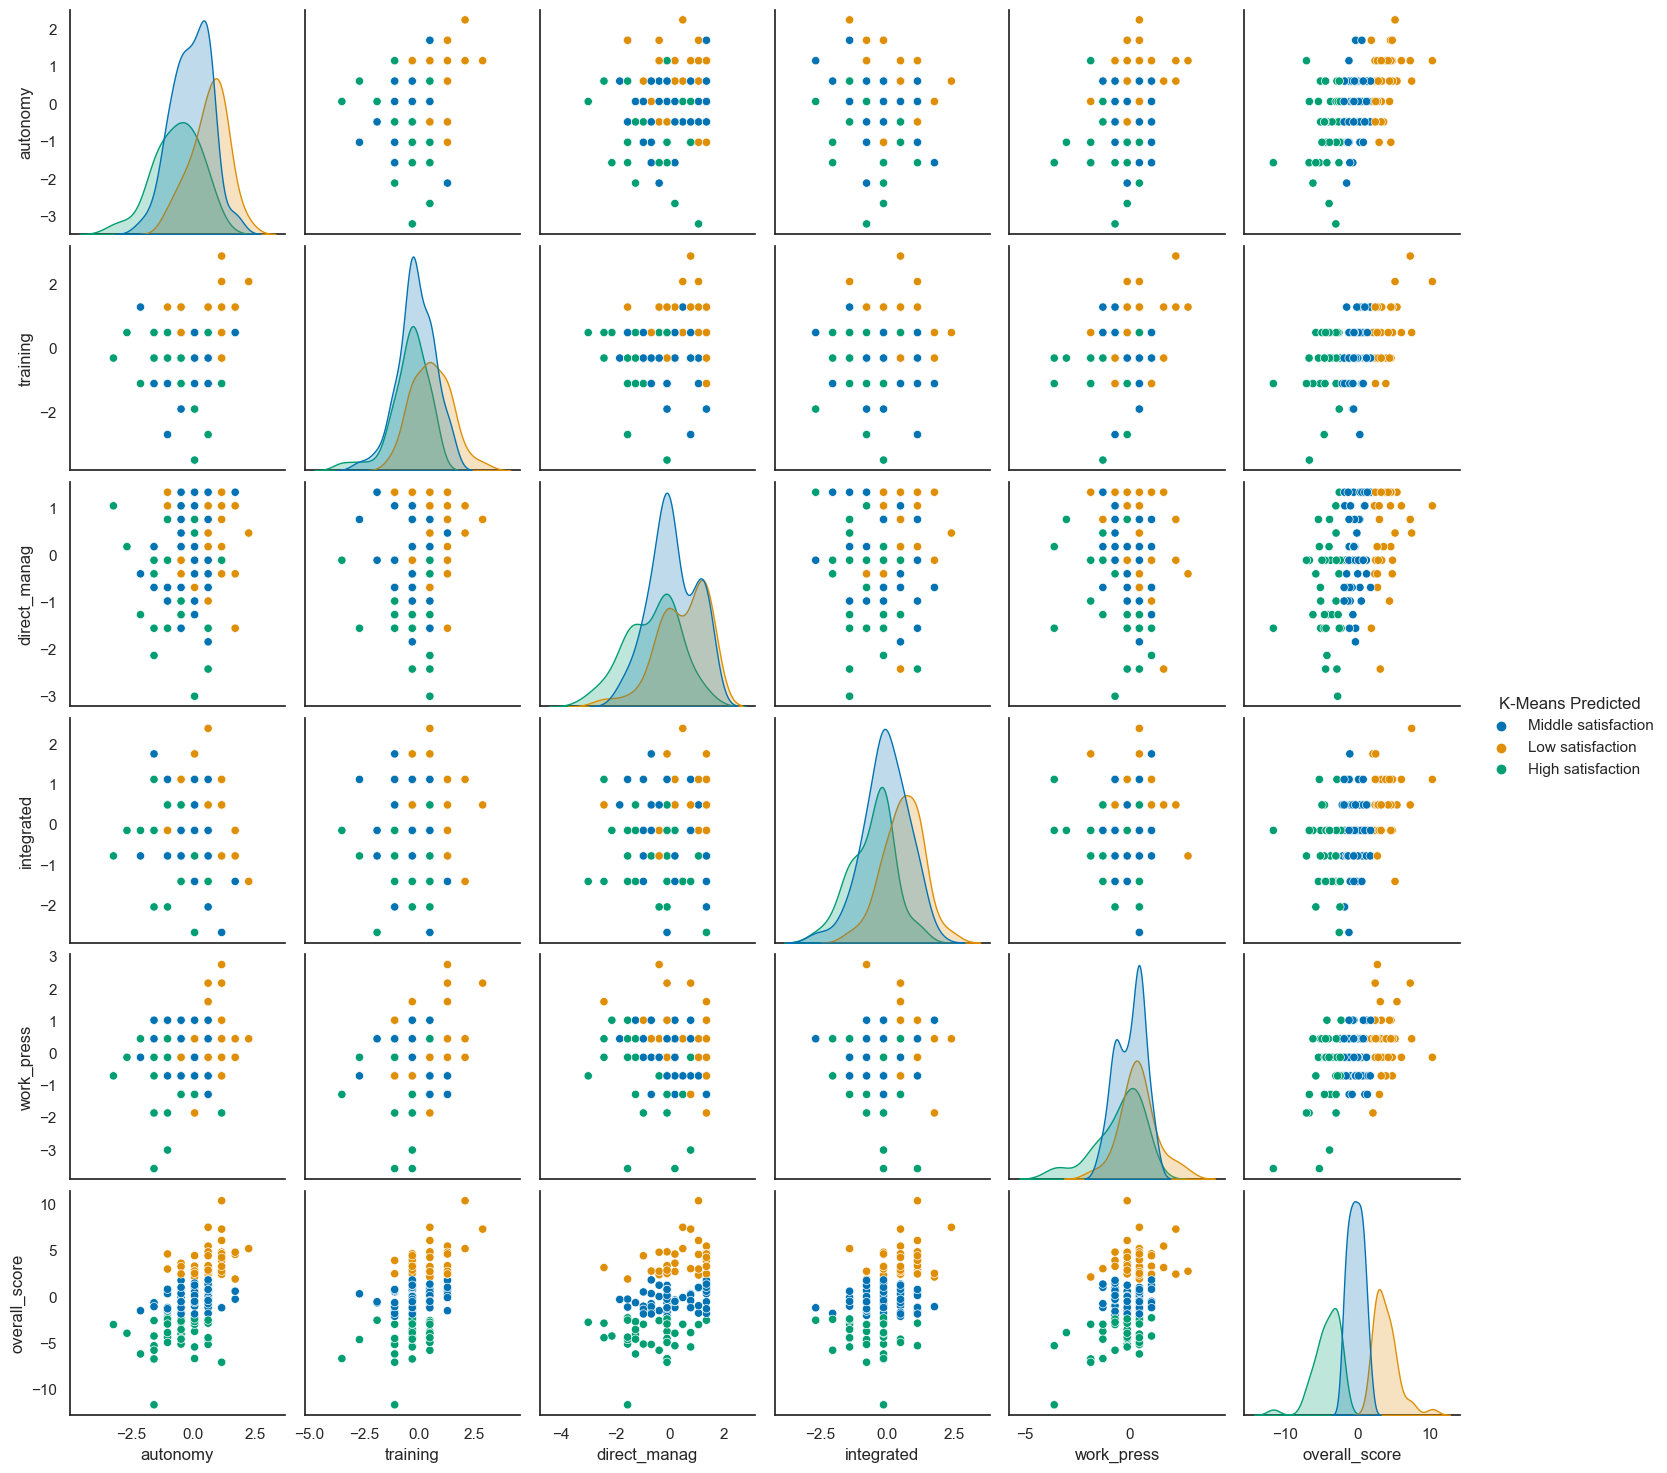

In [102]:
# Fit and visualise the identified cluster with k=3
kmeans = KMeans(n_clusters=3,
                      init='k-means++',
                      n_init=25,
                      random_state=1234).fit(X1)

X1['K-Means Predicted'] = kmeans.labels_ 
# Assign custom labels to the clusters
X1['K-Means Predicted'] = X1['K-Means Predicted'].map({0: 'Low satisfaction', 1: 'High satisfaction',  2: 'Middle satisfaction'})

# Plot the predicted
sns.pairplot(X1,
            hue='K-Means Predicted', palette='colorblind',
            diag_kind='kde')

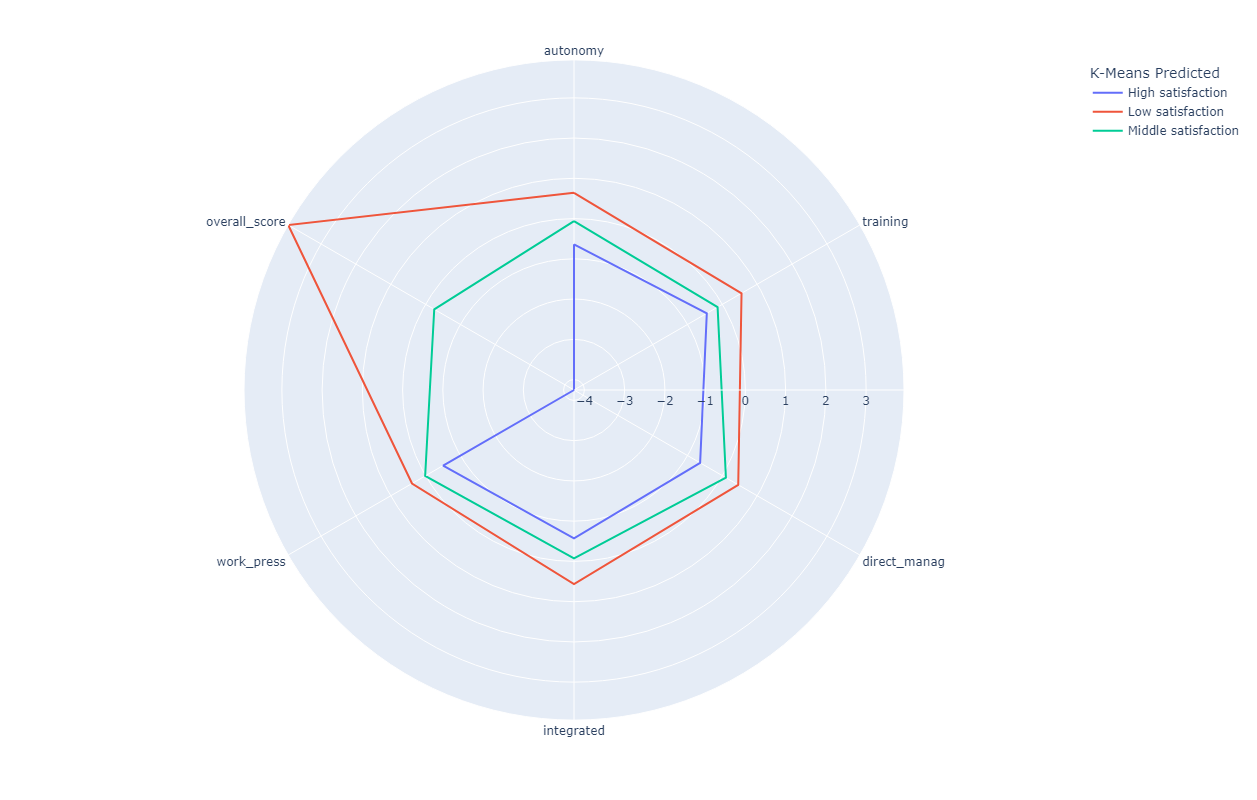

In [103]:
#line_polar plot
import plotly.express as px

polar=X1.groupby("K-Means Predicted").mean().reset_index()
polar=pd.melt(polar,id_vars=["K-Means Predicted"])
fig1 = px.line_polar(polar, r="value", theta="variable", color="K-Means Predicted", line_close=True,height=800,width=1400)
fig1.show()

In [104]:
# Check the number of observations per predicted class.
X1['K-Means Predicted'].value_counts()

Middle satisfaction    61
Low satisfaction       40
High satisfaction      40
Name: K-Means Predicted, dtype: int64

#### c) `k=4` based on the elbow and silhouett method

In [105]:
X1.drop('K-Means Predicted', axis=1, inplace=True)
X1

autonomy  training  direct_manag  integrated  work_press  overall_score
1    0.613432 -1.106388      1.053927   -0.147223   -0.705966          -1.76
2    0.613432 -0.308890     -2.419751    0.486283    1.598567           3.17
3   -0.475410 -1.106388     -1.551332   -0.780730   -0.129833          -5.11
4   -1.564251  0.488608     -0.393439   -0.147223   -0.129833          -2.57
5    0.613432 -0.308890      1.053927    0.486283   -0.705966          -0.96
..        ...       ...           ...         ...         ...            ...
137 -1.019830  0.488608     -0.103966    0.486283    0.446301          -4.93
138  0.613432  0.488608     -2.419751   -1.414237    0.446301          -4.42
139  0.069011 -0.308890     -0.393439    0.486283   -0.129833           1.26
140  1.157852 -0.308890      1.343400    0.486283   -0.705966           3.30
141  0.613432 -1.106388     -0.103966    1.119790    0.446301           0.80

[141 rows x 6 columns]

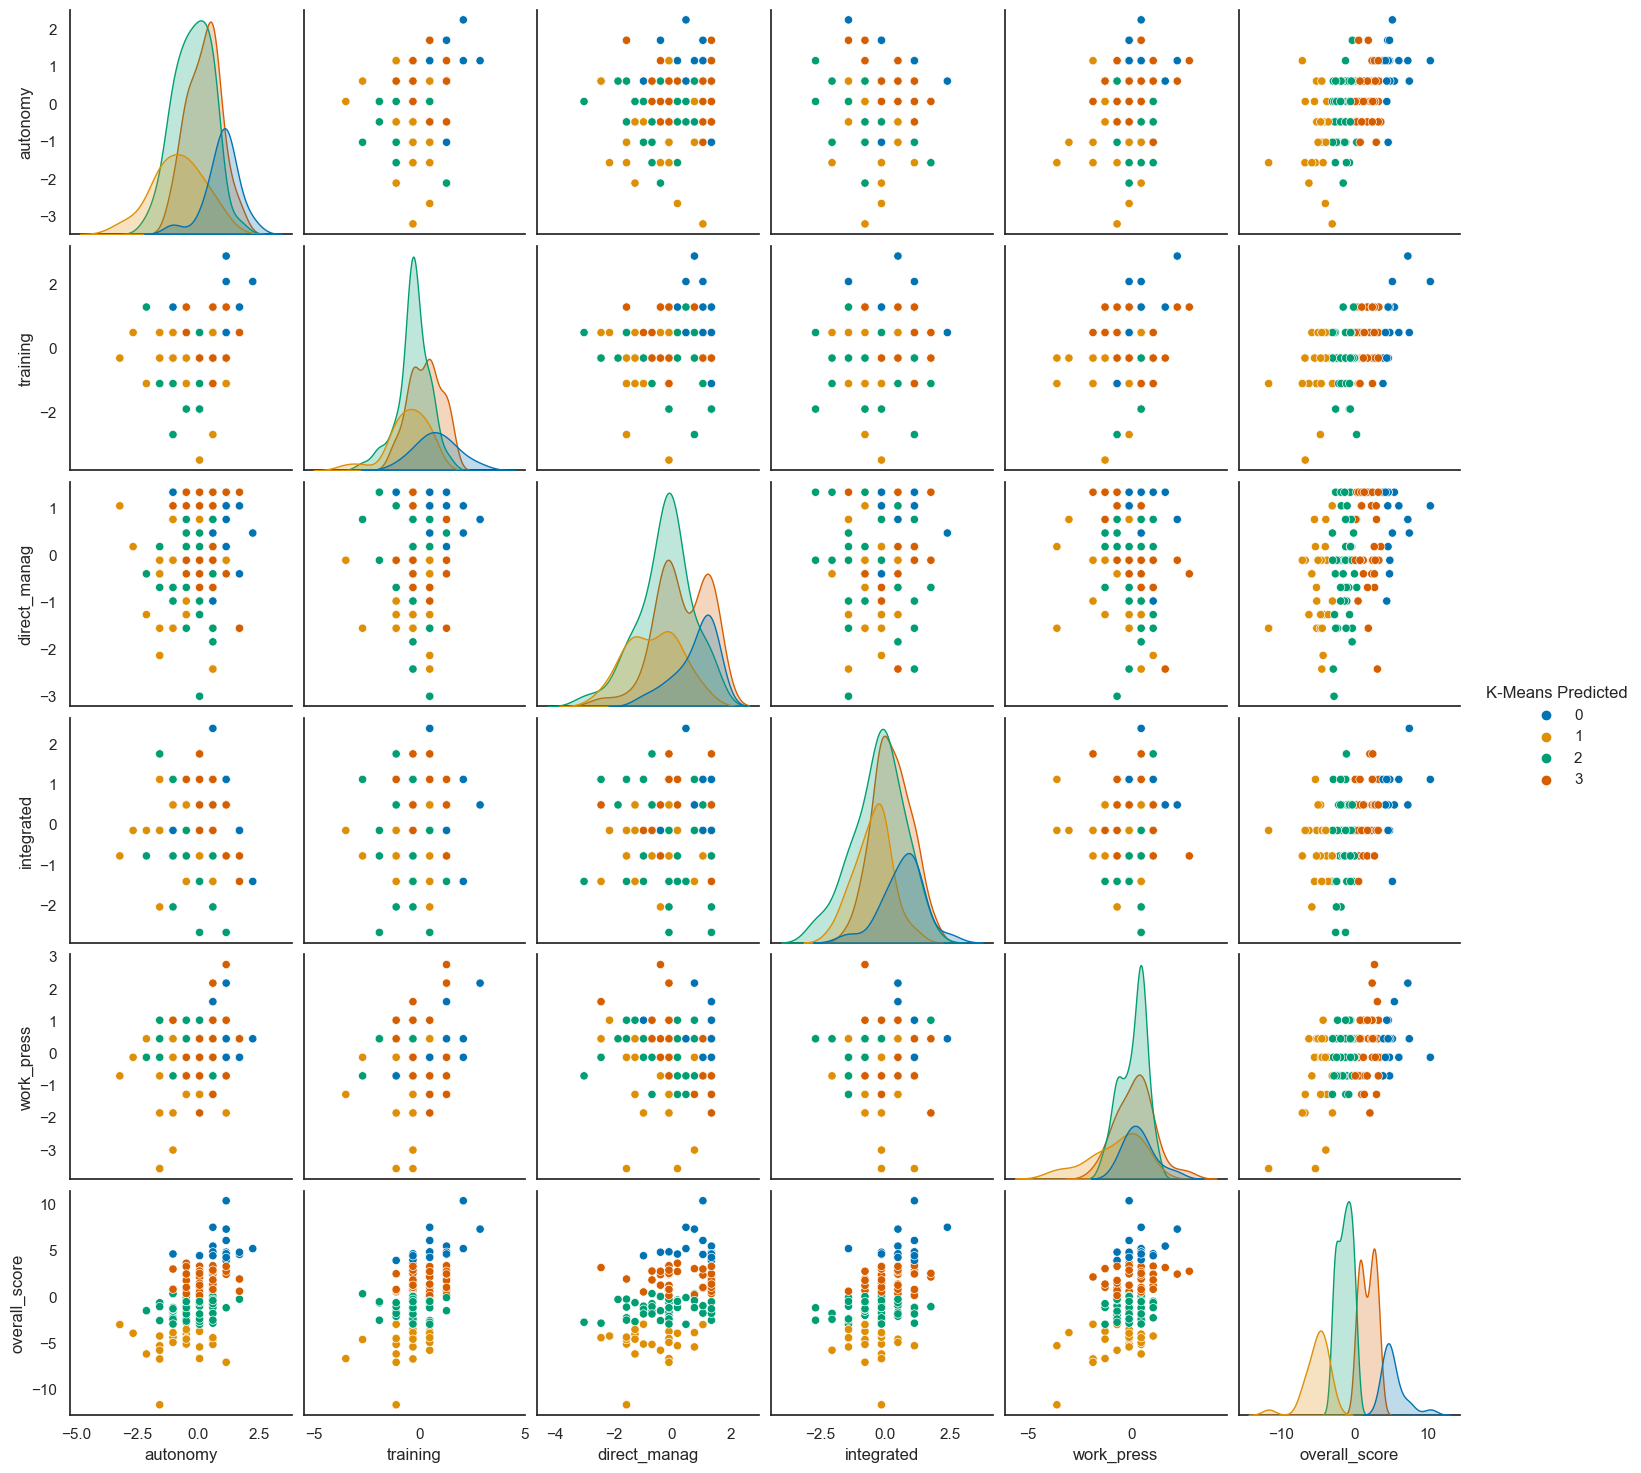

In [106]:
kmeans = KMeans(n_clusters=4,
                      init='k-means++',
                      n_init=25,
                      random_state=1234).fit(X1)

X1['K-Means Predicted'] = kmeans.labels_ 

# Plot the predicted
sns.pairplot(X1,
            hue='K-Means Predicted', palette='colorblind',
            diag_kind='kde')

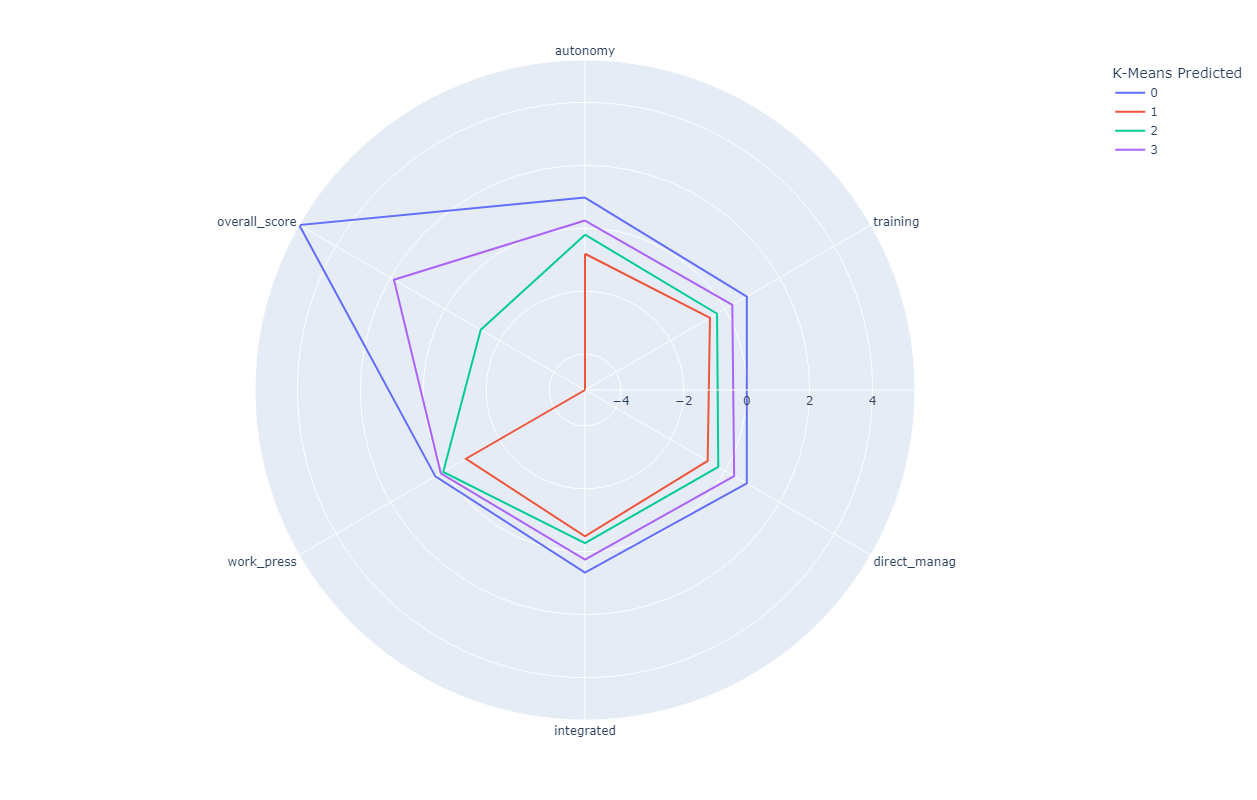

In [107]:
import plotly.express as px

polar=X1.groupby("K-Means Predicted").mean().reset_index()
polar=pd.melt(polar,id_vars=["K-Means Predicted"])
fig1 = px.line_polar(polar, r="value", theta="variable", color="K-Means Predicted", line_close=True,height=800,width=1400)
fig1.show()

### Set `k=3`

In [108]:
X1.drop('K-Means Predicted', axis=1, inplace=True)
X1

autonomy  training  direct_manag  integrated  work_press  overall_score
1    0.613432 -1.106388      1.053927   -0.147223   -0.705966          -1.76
2    0.613432 -0.308890     -2.419751    0.486283    1.598567           3.17
3   -0.475410 -1.106388     -1.551332   -0.780730   -0.129833          -5.11
4   -1.564251  0.488608     -0.393439   -0.147223   -0.129833          -2.57
5    0.613432 -0.308890      1.053927    0.486283   -0.705966          -0.96
..        ...       ...           ...         ...         ...            ...
137 -1.019830  0.488608     -0.103966    0.486283    0.446301          -4.93
138  0.613432  0.488608     -2.419751   -1.414237    0.446301          -4.42
139  0.069011 -0.308890     -0.393439    0.486283   -0.129833           1.26
140  1.157852 -0.308890      1.343400    0.486283   -0.705966           3.30
141  0.613432 -1.106388     -0.103966    1.119790    0.446301           0.80

[141 rows x 6 columns]

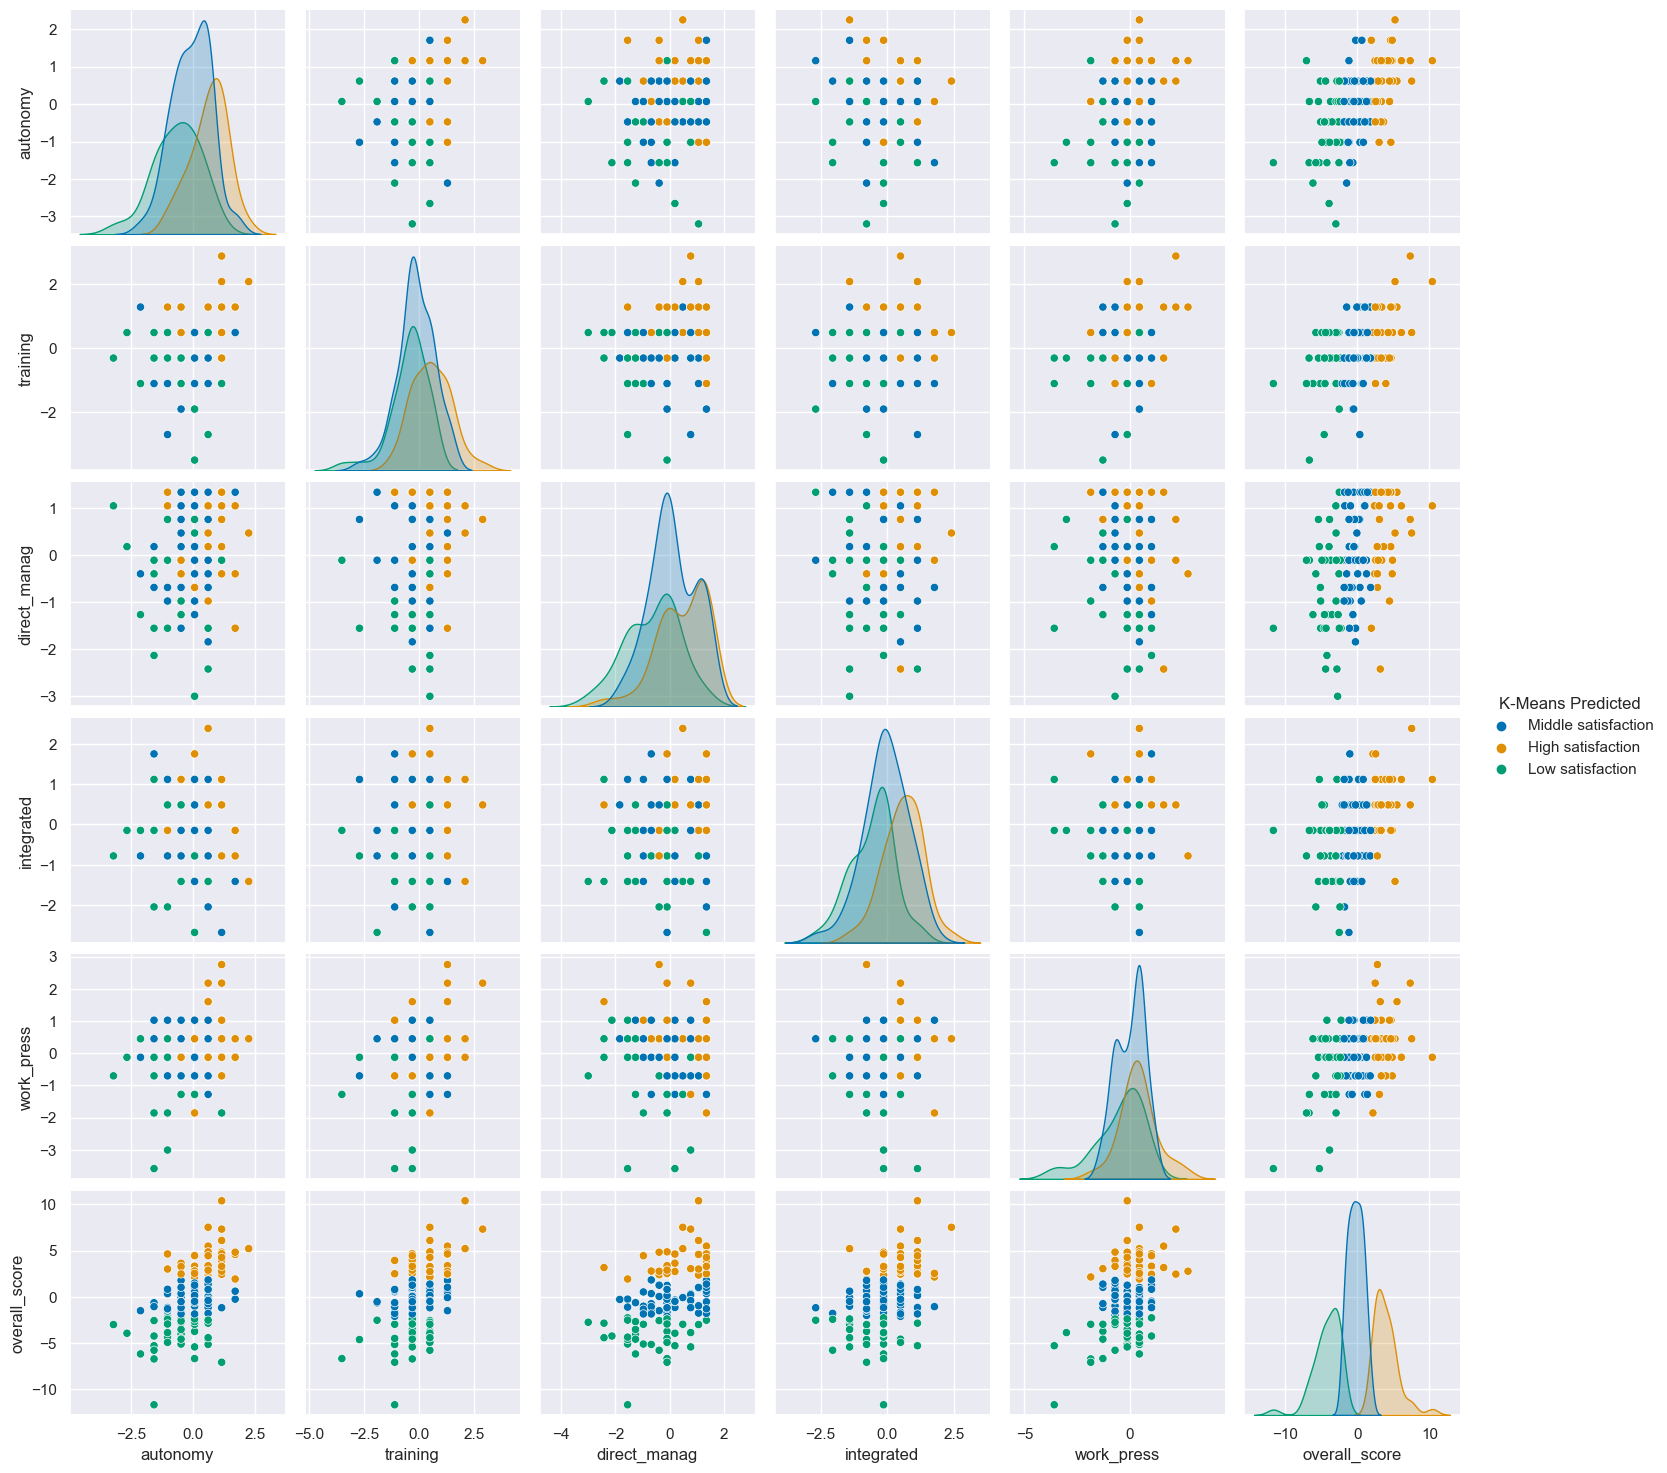

In [46]:
# Apply the final model.
# Use three clusters.

kmeans = KMeans(n_clusters=3,
                      init='k-means++',
                      n_init=25,
                      random_state=1234).fit(X1)

X1['K-Means Predicted'] = kmeans.labels_ 
# Assign custom labels to the clusters
X1['K-Means Predicted'] = X1['K-Means Predicted'].map({0: 'High satisfaction', 1: 'Low satisfaction',  2: 'Middle satisfaction'})

# Plot the predicted
sns.pairplot(X1,
            hue='K-Means Predicted', palette='colorblind',
            diag_kind='kde')

In [47]:
# Check the number of observations per predicted class.
X1['K-Means Predicted'].value_counts()

Middle satisfaction    61
High satisfaction      40
Low satisfaction       40
Name: K-Means Predicted, dtype: int64

### 6. Visualise the final clusters

In [48]:
# Visualise the clusters.
clusters = kmeans.labels_
X1['K-Means Predicted'] = clusters

# View the DataFrame.
X1.head()

autonomy  training  direct_manag  integrated  work_press  overall_score  \
1  0.613432 -1.106388      1.053927   -0.147223   -0.705966          -1.76   
2  0.613432 -0.308890     -2.419751    0.486283    1.598567           3.17   
3 -0.475410 -1.106388     -1.551332   -0.780730   -0.129833          -5.11   
4 -1.564251  0.488608     -0.393439   -0.147223   -0.129833          -2.57   
5  0.613432 -0.308890      1.053927    0.486283   -0.705966          -0.96   

   K-Means Predicted  
1                  2  
2                  0  
3                  1  
4                  1  
5                  2

<Axes: xlabel='work_press', ylabel='overall_score'>

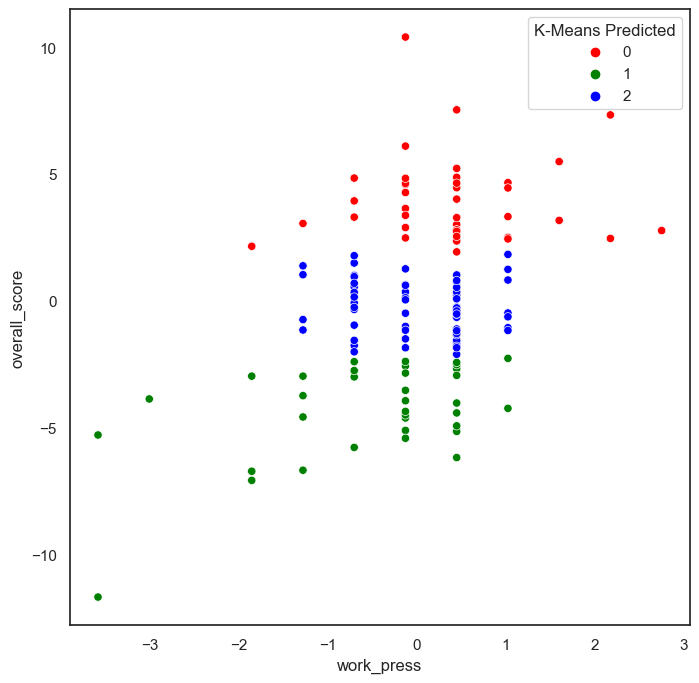

In [49]:
# Visualise the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(8, 8)})

# Create a scatterplot.
sns.set_style('white')

sns.scatterplot(x ='work_press' , 
                y = 'overall_score',
                data=X1 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

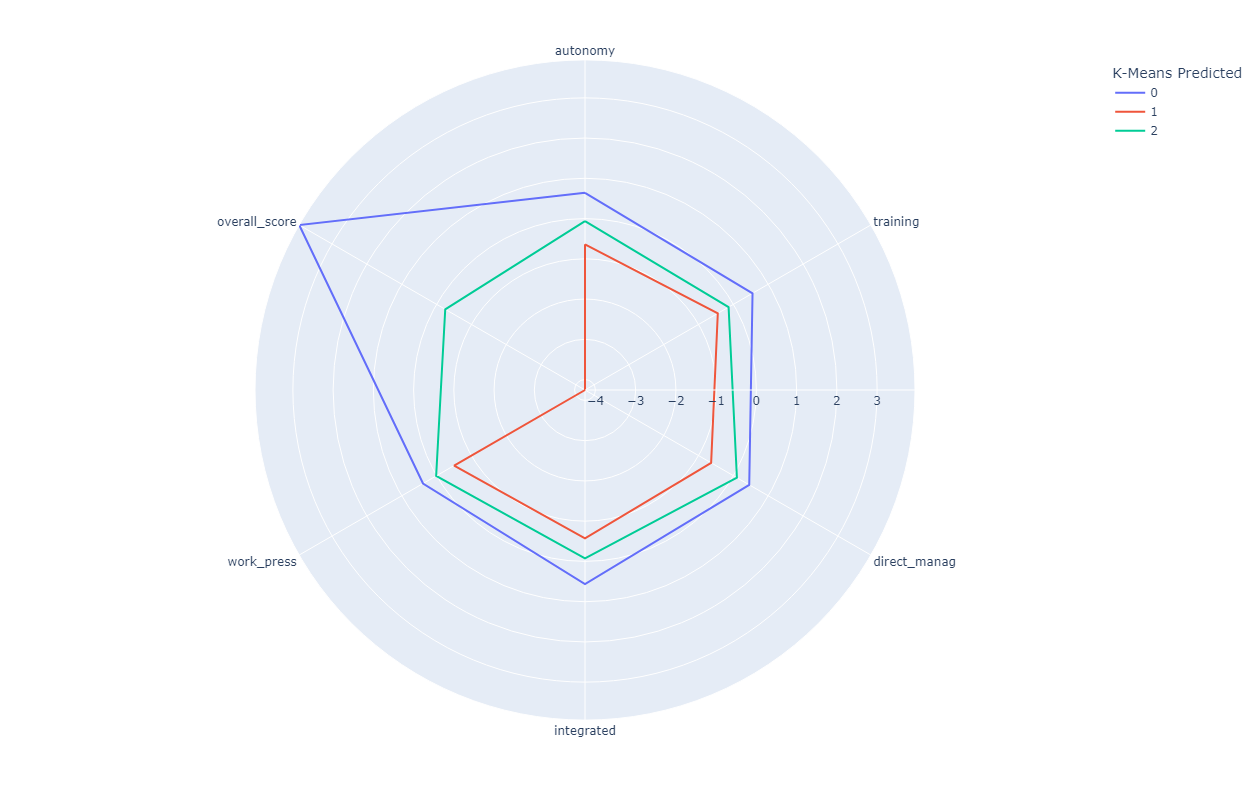

In [50]:
import plotly.express as px

polar=X1.groupby("K-Means Predicted").mean().reset_index()
polar=pd.melt(polar,id_vars=["K-Means Predicted"])
fig1 = px.line_polar(polar, r="value", theta="variable", color="K-Means Predicted", line_close=True,height=800,width=1400)
fig1.show()

## 4.2. Decision Tree - Regression 
The main objective of using Regression Decision Tree is to find out what factors are significant to the `overall_score`. We will start with 

General guideline to perform a regression decision tree are as follows:
- Step 1: Import and prepare the data
- Step 2: Set the variables
- Step 3: Split the data 
- Step 4: Fit and evaluate the model
- Step 5: Visualise a decision tree
- Step 6: Prune the tree
- Step 7: Share your findings

### 1. Import and prepare the data
We have imported the data above.

In [109]:
# Install Scikit-learn
!pip install scikit-learn

In [52]:
# Create a  new dataset for decision tree analysis
df_tree = data[['workloc', 'workleng', 'manag_resp', 'involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'work_press',
       'reflexive', 'innovative', 'customers', 'overall_score', 'intent_quit',
       'sentiment', 'overall_hue']]
df_tree

workloc  workleng  manag_resp  involved  autonomy  direct_manag  \
1          0         3           0 -1.017589  0.613432      1.053927   
2          0         3           0  1.510066  0.613432     -2.419751   
3          0         3           0  1.088790 -0.475410     -1.551332   
4          1         3           0 -0.596313 -1.564251     -0.393439   
5          1         3           1  0.246239  0.613432      1.053927   
..       ...       ...         ...       ...       ...           ...   
137        0        18           0 -3.545243 -1.019830     -0.103966   
138        1        18           0 -1.438864  0.613432     -2.419751   
139        0        18           1  1.510066  0.069011     -0.393439   
140        0        23           0 -0.175037  1.157852      1.343400   
141        1        23           1 -1.017589  0.613432     -0.103966   

     integrated   welfare  training  work_press  reflexive  innovative  \
1     -0.147223  1.073410 -1.106388   -0.705966   2.004760   -1.880934   
2      0.486283  0.040025 -0.308890    1.598567  -1.466898    0.744976   
3     -0.780730 -1.510051 -1.106388   -0.129833  -1.218922    1.120106   
4     -0.147223  0.040025  0.488608   -0.129833   0.268931    0.744976   
5      0.486283  0.556717 -0.308890   -0.705966  -0.474995   -1.880934   
..          ...       ...       ...         ...        ...         ...   
137    0.486283 -0.993359  0.488608    0.446301  -1.218922   -0.380414   
138   -1.414237 -0.993359  0.488608    0.446301  -0.227020   -0.380414   
139    0.486283 -1.510051 -0.308890   -0.129833  -1.218922    1.120106   
140    0.486283  0.556717 -0.308890   -0.705966  -0.722971    1.120106   
141    1.119790  0.040025 -1.106388    0.446301   0.268931   -0.005284   

     customers  overall_score  intent_quit  sentiment    overall_hue  
1    -1.645745          -1.76            1          3   2-medium_low  
2     2.370901           3.17            1          2         4-high  
3    -0.550296          -5.11            1          3          1-low  
4    -1.280595          -2.57            2          2          1-low  
5    -0.550296          -0.96            2          2   2-medium_low  
..         ...            ...          ...        ...            ...  
137   0.910302          -4.93            3          1          1-low  
138   0.910302          -4.42            3          1          1-low  
139   1.640602           1.26            3          1  3-medium_high  
140   0.545153           3.30            3          1         4-high  
141   0.545153           0.80            3          1  3-medium_high  

[141 rows x 17 columns]

### 2. Specify the model for regression tree

In [53]:
# Set variables for the model
X2 = df_tree[['autonomy', 'training', 'direct_manag', 'integrated', 'work_press', 'welfare']]
y2 = df_tree['overall_score']

In [54]:
# split the dataset
from sklearn.model_selection import train_test_split
X2_train, X2_test,  y2_train, y2_test = train_test_split(X2, y2,
                                                    train_size=0.8,
                                                    random_state=1234)

In [55]:
X2_train.shape, X2_test.shape

((112, 6), (29, 6))

### 3. Train and evaluate the regression tree

In [56]:
# Import DecisionTreeRegressor class from the tree module
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', random_state=1234)

# Fit the model
model = regressor.fit(X2_train, y2_train)

To evaluate the model, we compute R2 for both train and test sets, and compute the Mean Absolute Error.

We can use the `score` method to compute the R-squared of both train and test sets.

In [57]:
# Return the R2 for the train dataset
model.score(X2_train, y2_train)

1.0

In [58]:
# Return the R2 for the test dataset
model.score(X2_test, y2_test)

0.4357339767941143

In [59]:
y2_test_pred = model.predict(X2_test)

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test, y2_test_pred)

1.7172413793103447

Mean absolute error mean that we should expect the predicted y_test values are off the mark by 1.7 points, 

which is acceptable considering the `overall_score` ranges from -10 to 10.

### 4. Visualise the Regression Tree

from sklearn import tree
plt.figure(figsize = (15,5))
tree.plot_tree(model,
              feature_names = list(X_train.columns),
              filled = True)

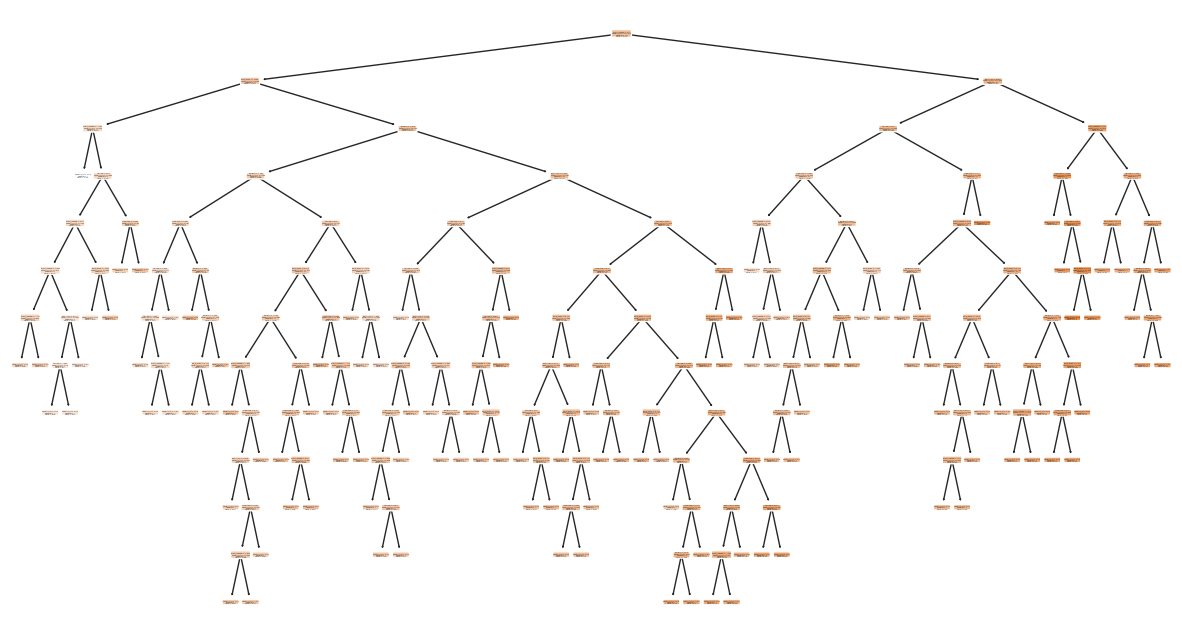

In [61]:
# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(model,
               feature_names =  list(X2_train.columns),
               #max_depth=3,
               filled=True,
               rounded=True)

# View the plot.
plt.show()

In [62]:
# Install the Graphviz library.
!pip install graphviz

#########

# Install IPhyton.
!pip install ipython

In [63]:
!pip install graphviz

In [64]:
import graphviz

In [65]:
from IPython.display import display

In [66]:
# Create the plot.
dot_data = tree.export_graphviz(model, 
                     feature_names = list(X2_train.columns),
                     max_depth=2,
                     filled = True)

In [67]:
# View the plot.
display(graphviz.Source(dot_data))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Import graphviz and display.
import graphviz
from IPython.display import display

# Create the plot.
dot_data = tree.export_graphviz(model, 
                     feature_names = list(X2_train.columns),
                     max_depth=2,
                     filled = True)

# View the plot.
display(graphviz.Source(dot_data))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[0.16860197 0.11921313 0.29541357 0.10364429 0.17044918 0.14267785]


Text(0, 0.5, 'Importance')

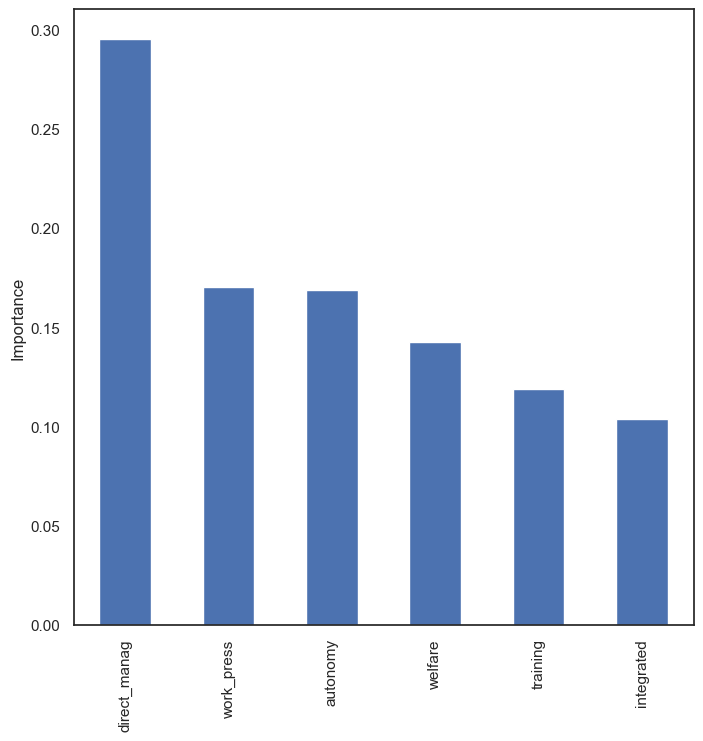

In [ ]:
# get importance of each feature
importance = model.feature_importances_
print(importance)

# Visualise the importance scores
feature_importance = pd.Series(importance, index = X2_train.columns)
feature_importance.sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Importance')

### 5. Prune the regression tree

In [ ]:
# Return the R2 for the train dataset
model.score(X2_train, y2_train)

1.0

In [ ]:
# Return the R2 for the train dataset
model.score(X2_test, y2_test)

0.4357339767941143

The tree is massive with many nodes and branches that may not all relevant, we will prune this tree.

Two ways to prune a decision tree
 - 1) Pre-Prunning: Set the parameters that manage its growth during the recursive paritioning process
 - 2) Post-Prunning: allow the tree to fully grow unimpeded, then gradually reduce its size in order to improve its performance.

We will use the the post-prunning approach. Scpecifically, we will use the cost complexity prunning. The primary objective in **cost complexity prunning** is finding the right parameter, known as alpha. The right alpha is the one that performs thet best with the test data. To get a list of effective alpha values to choose from, we start by passing the training data to the cost complexity prunning path method of our previously instantiiated regressor object.

Let's get the list of effective alphas for the training data.

In [ ]:
path = regressor.cost_complexity_pruning_path(X2_train, y2_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 4.4642857146718183e-07,
 7.142857142903937e-06,
 7.142857143094261e-06,
 1.6071428571414908e-05,
 2.8571428571419477e-05,
 2.8571428571428567e-05,
 7.544642857142621e-05,
 7.544642857143513e-05,
 0.00014464285714290069,
 0.00021488095238095646,
 0.00030133928571430505,
 0.00032544642857143134,
 0.00035000000000000905,
 0.0003500000000000129,
 0.0003870535714286369,
 0.0004290178571428574,
 0.0006482142857142864,
 0.0006790178571427417,
 0.0006790178571428448,
 0.0007142857142856991,
 0.0007142857142857152,
 0.000787499999999941,
 0.0008595238095231597,
 0.0009053571428571343,
 0.0009861607142856682,
 0.0010751488095238132,
 0.001125669642857049,
 0.0013430059523809523,
 0.0015017857142857155,
 0.001548214285714357,
 0.0016071428571429736,
 0.002072023809523807,
 0.002125446428571428,
 0.0028339285714285714,
 0.0029169642857142775,
 0.003471428571428569,
 0.0036680059523809742,
 0.004373616071428674,
 0.004375446428571461,
 0.0045026785714287676,
 0.004644642857142856,
 0.0052037

We remove the maximum effective alpha because it is the trivial tree with just one node.

In [ ]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 4.4642857146718183e-07,
 7.142857142903937e-06,
 7.142857143094261e-06,
 1.6071428571414908e-05,
 2.8571428571419477e-05,
 2.8571428571428567e-05,
 7.544642857142621e-05,
 7.544642857143513e-05,
 0.00014464285714290069,
 0.00021488095238095646,
 0.00030133928571430505,
 0.00032544642857143134,
 0.00035000000000000905,
 0.0003500000000000129,
 0.0003870535714286369,
 0.0004290178571428574,
 0.0006482142857142864,
 0.0006790178571427417,
 0.0006790178571428448,
 0.0007142857142856991,
 0.0007142857142857152,
 0.000787499999999941,
 0.0008595238095231597,
 0.0009053571428571343,
 0.0009861607142856682,
 0.0010751488095238132,
 0.001125669642857049,
 0.0013430059523809523,
 0.0015017857142857155,
 0.001548214285714357,
 0.0016071428571429736,
 0.002072023809523807,
 0.002125446428571428,
 0.0028339285714285714,
 0.0029169642857142775,
 0.003471428571428569,
 0.0036680059523809742,
 0.004373616071428674,
 0.004375446428571461,
 0.0045026785714287676,
 0.004644642857142856,
 0.0052037

Next, we train several tree using the different values for alphas

In [ ]:

train_scores, test_scores = [], []

for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state=1234, ccp_alpha=alpha)
    model_ = regressor_.fit(X2_train, y2_train)
    train_scores.append(model_.score(X2_train, y2_train))
    test_scores.append(model_.score(X2_test, y2_test))

Text(0.5, 1.0, 'R-squared by alpha')

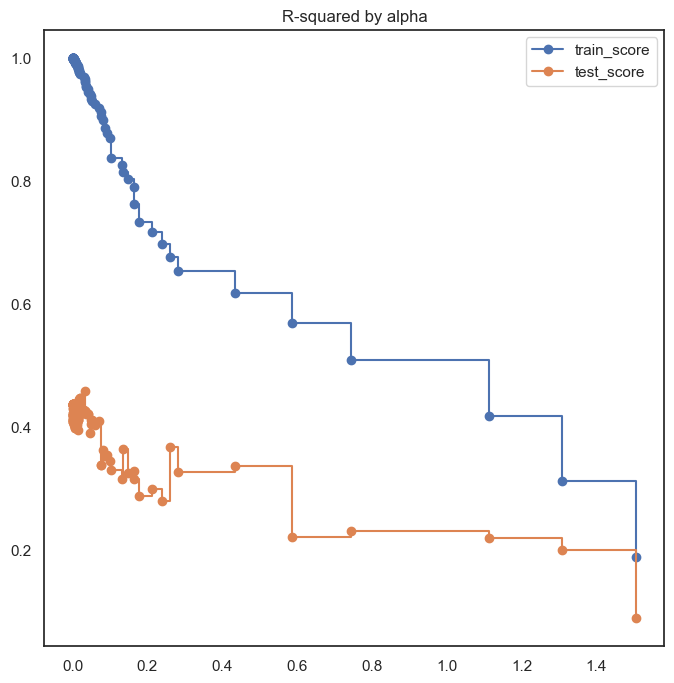

In [ ]:
# Plot the training and test scores with different values of alphas

plt.plot(ccp_alphas,
        train_scores,
        marker='o',
        label='train_score',
        drawstyle='steps-post')

plt.plot(ccp_alphas,
        test_scores,
         marker='o',
         label='test_score',
         drawstyle='steps-post')

plt.legend()
plt.title('R-squared by alpha')

In [ ]:
test_scores

[0.4357339767941143,
 0.4357339767941143,
 0.4357339767941143,
 0.43573256649220904,
 0.43573256649220904,
 0.43573256649220904,
 0.43573256649220904,
 0.43635019058284985,
 0.43635019058284985,
 0.43635019058284985,
 0.43635019058284985,
 0.43635019058284985,
 0.43635019058284985,
 0.43613300408943767,
 0.43613300408943767,
 0.43613300408943767,
 0.4297226530667525,
 0.4281092676871189,
 0.42137498794556605,
 0.42137498794556605,
 0.4184415599825958,
 0.4184415599825958,
 0.4184415599825958,
 0.4184028550303066,
 0.4184028550303066,
 0.4161533353475254,
 0.41476893794599756,
 0.4113565141624813,
 0.41125789096674437,
 0.41125789096674437,
 0.41125789096674437,
 0.4073019941224507,
 0.4075677968565419,
 0.4075677968565419,
 0.4070812426992222,
 0.4089399324665044,
 0.40736603554021855,
 0.40736603554021855,
 0.4031529146128604,
 0.4271500829697902,
 0.4271500829697902,
 0.4271500829697902,
 0.4158299911204473,
 0.4158299911204473,
 0.4188379006527898,
 0.39938062634474103,
 0.397279629

In [ ]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

0.03209768601190485

In [ ]:
# fit the data prunned
regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha=best_alpha)
model_ = regressor_.fit(X2_train, y2_train)

In [ ]:
model_.score(X2_train, y2_train)

0.9630709220219767

In [ ]:
model_.score(X2_test, y2_test)

0.4575808399624547

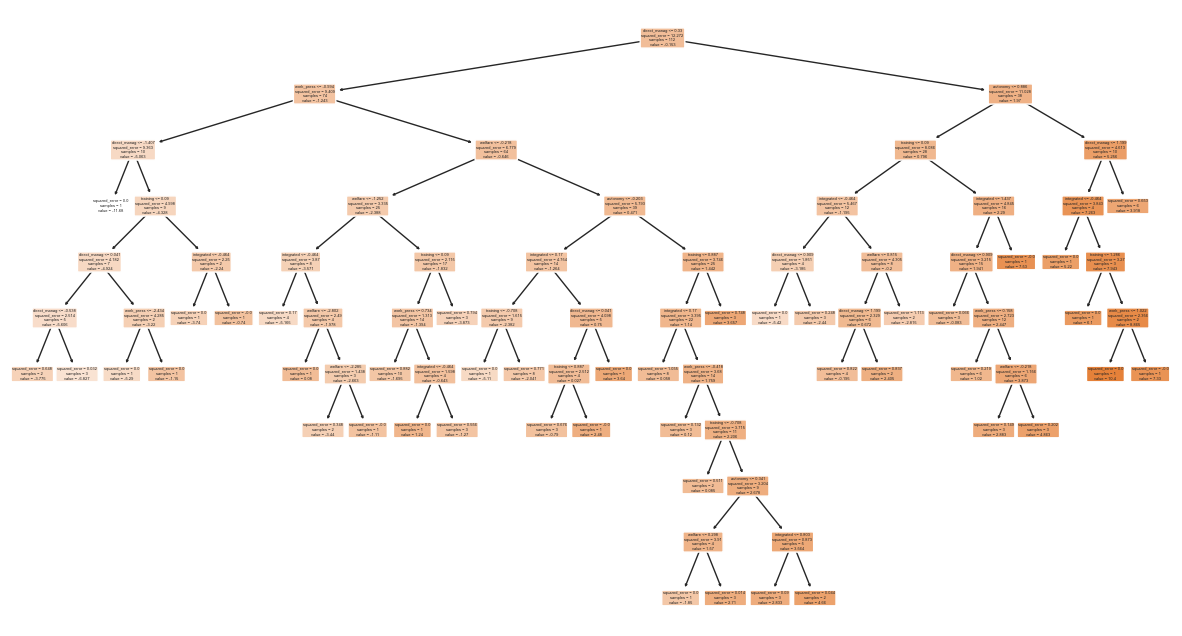

In [ ]:
# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(model_,
               feature_names =  list(X2_train.columns),
               #max_depth=3,
               filled=True,
               rounded=True)

# View the plot.
plt.show()

In [ ]:
# Import graphviz and display.
import graphviz
from IPython.display import display

# Create the plot.
dot_data = tree.export_graphviz(model_,
                     feature_names = list(X2_train.columns),
                    max_depth=3,
                     filled = True)

# View the plot.
display(graphviz.Source(dot_data))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[0.16702291 0.12002315 0.29873461 0.10458405 0.16610221 0.14353307]


Text(0, 0.5, 'Importance')

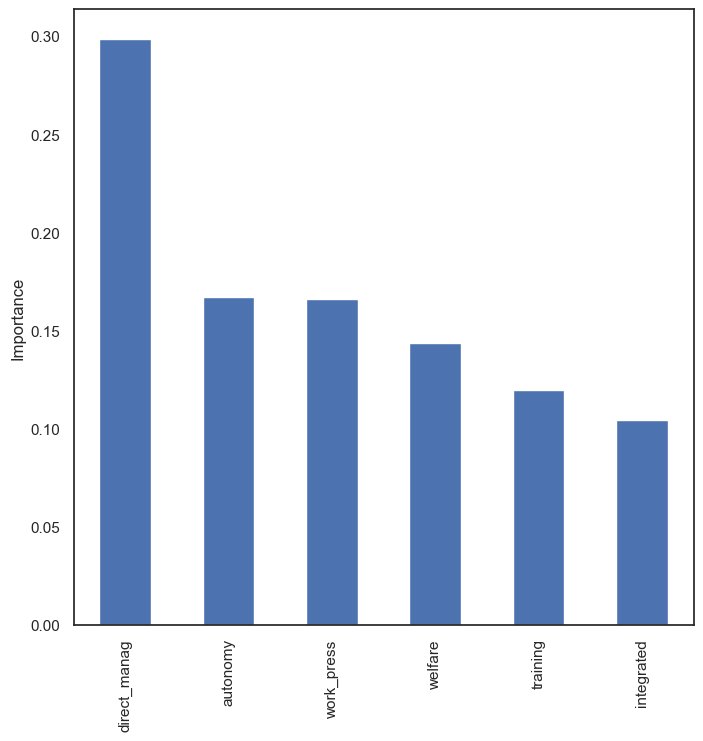

In [ ]:
# get importance of each feature
importance = model_.feature_importances_
print(importance)

# Visualise the importance scores
feature_importance = pd.Series(importance, index = X2_train.columns)
feature_importance.sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Importance')

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test, y2_test_pred)

1.7172413793103447

# 4.3. Decision Tree - Classification: Onsite vs. Remote staff

Classification Decision Tree 'autonomy', 'welfare', and 'training' on staff who work on-site and remotely

## 1. Exploring the differences between work location

Note that the majority of staff (67%) work remotely as shown in the descriptive statistics.

<Axes: xlabel='workloc', ylabel='overall_score'>

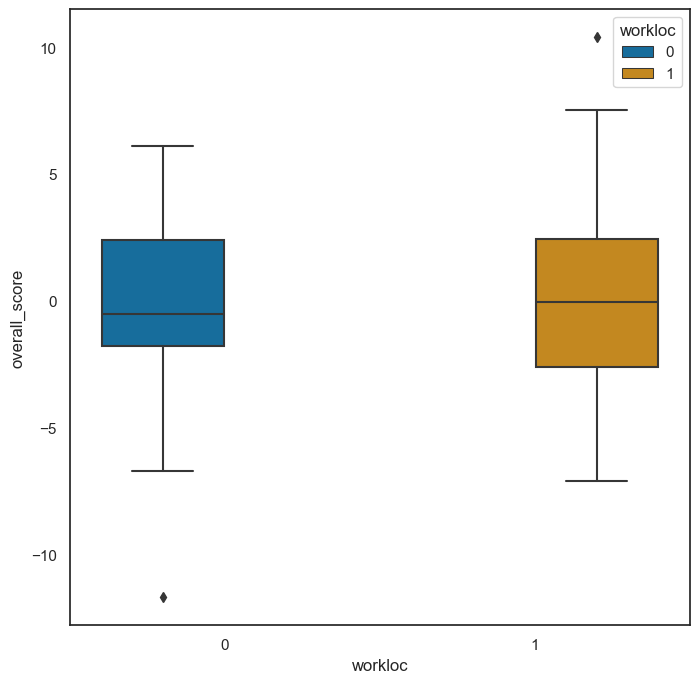

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = data,
           x = 'workloc',
           y = 'overall_score',
            hue = 'workloc',
           palette = 'colorblind')

> Value of 1 indicate 'remote'. The graph shows remote staff have higher overall satisfaction.

<function matplotlib.pyplot.show(close=None, block=None)>

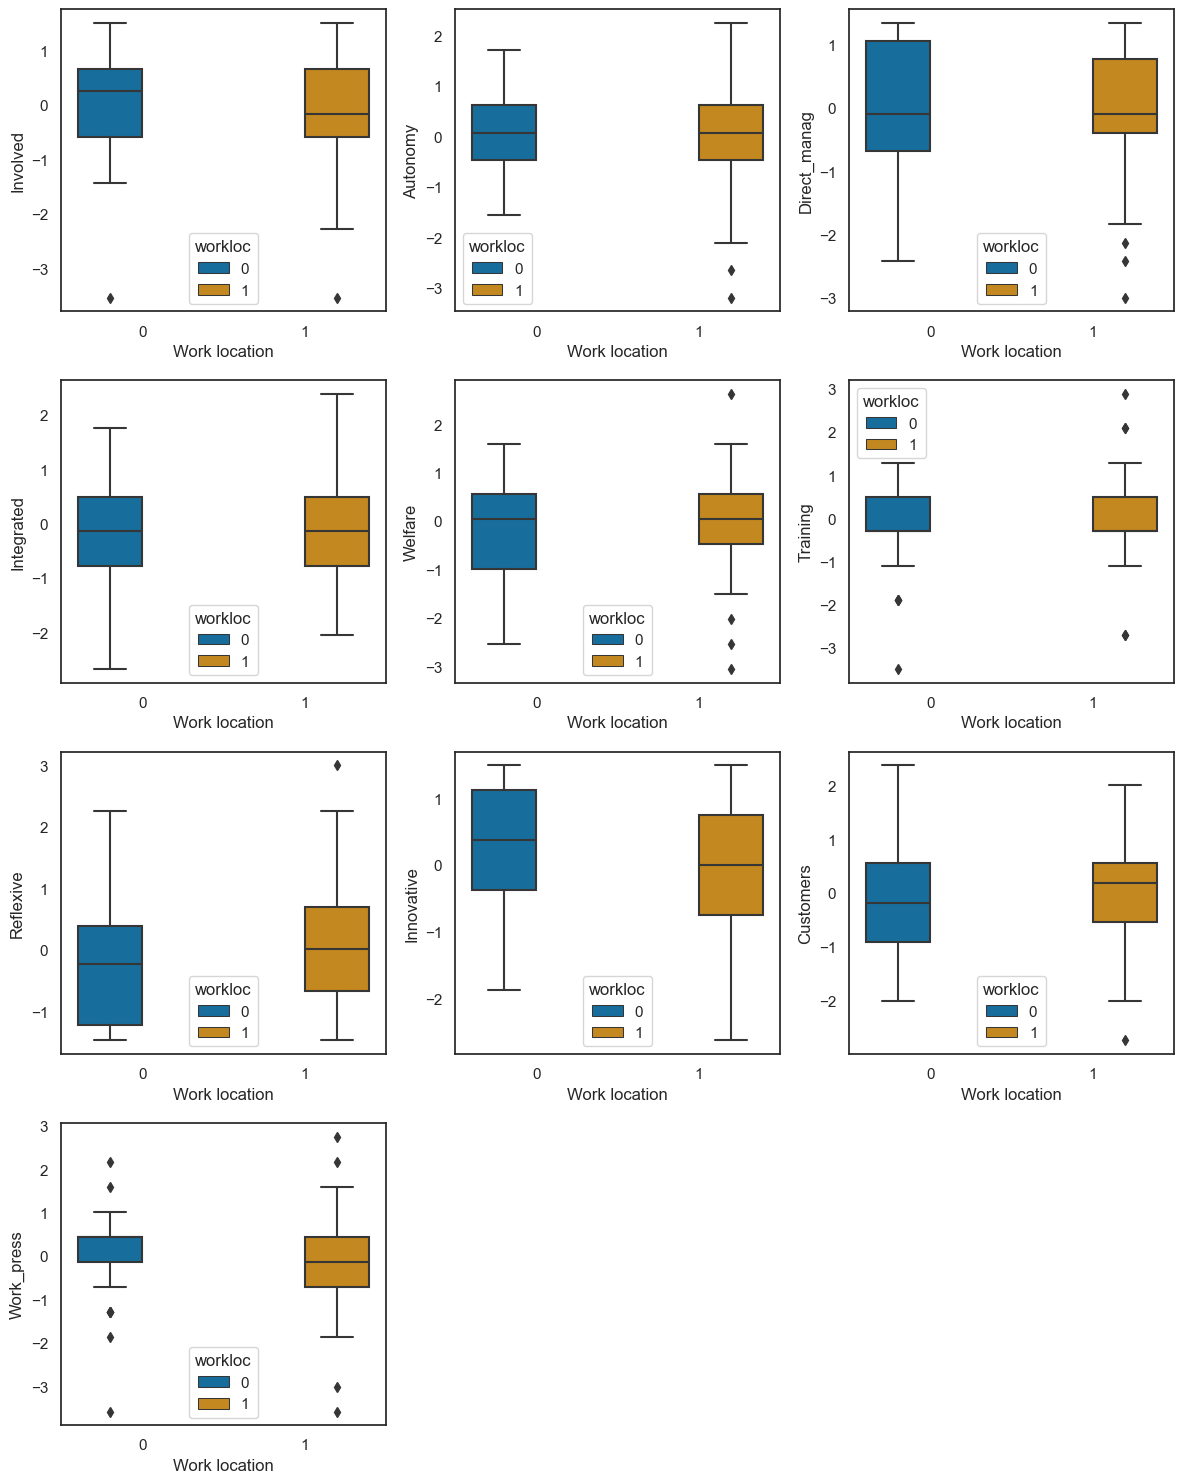

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(12,15))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# List of focal areas to create subplots for
focal_areas = ['involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'reflexive',
       'innovative', 'customers', 'work_press']

# Iterate over the subplots and create a boxplot for each
for i, focal_area in enumerate(focal_areas):
    sns.boxplot(data=data, x='workloc', y=focal_area, hue='workloc', 
                palette='colorblind', ax=axes[i])
    axes[i].set_xlabel('Work location')
    axes[i].set_ylabel(focal_area.capitalize())
    
# Remove any extra subplots if the number of focal is less than 12
if len(focal_area) < 12:
    for j in range(len(focal_areas), 12):
        fig.delaxes(axes[j])
        
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show


In [ ]:
group_means = df_cluster.groupby('workloc').mean().round(2)
mean_diff = group_means.diff().iloc[1]

group_means = group_means.append(mean_diff, ignore_index=True)
group_means.index = ['office', 'remote', 'mean_diff']

group_means

workleng  manag_resp  involved  autonomy  direct_manag  integrated  \
office        10.23        0.30      0.00      0.07         -0.05       -0.07   
remote         9.33        0.24     -0.04     -0.08          0.01       -0.02   
mean_diff     -0.90       -0.06     -0.04     -0.15          0.06        0.05   

           welfare  training  reflexive  innovative  customers  work_press  \
office       -0.12     -0.19      -0.26        0.23      -0.05        0.03   
remote        0.03      0.05       0.10       -0.09      -0.00       -0.06   
mean_diff     0.15      0.24       0.36       -0.32       0.05       -0.09   

           overall_score  
office             -0.41  
remote             -0.09  
mean_diff           0.32

> **Remote staff** compared to the **in-office staff** has the following:
> - Higher score in the areas: `direct_manag`, `integrated`, `welfare`, `training`, `reflexive`, `customer`
> - Lower score in the areas: `invovled`, `autonomy`, `innovative`, `work_press`
> - Remote staff have higher overall satisfaction compared to on-site staff.

> We notice that the largest **difference in means** of `reflexive`(0.36), `innovative` (-0.32), `training` (0.24), `welfare` (0.15), and `autonomy`(0.15). 
> We will explore these 5 aspects together with `overall_score` in two classification decision trees.

<Axes: xlabel='overall_score', ylabel='Count'>

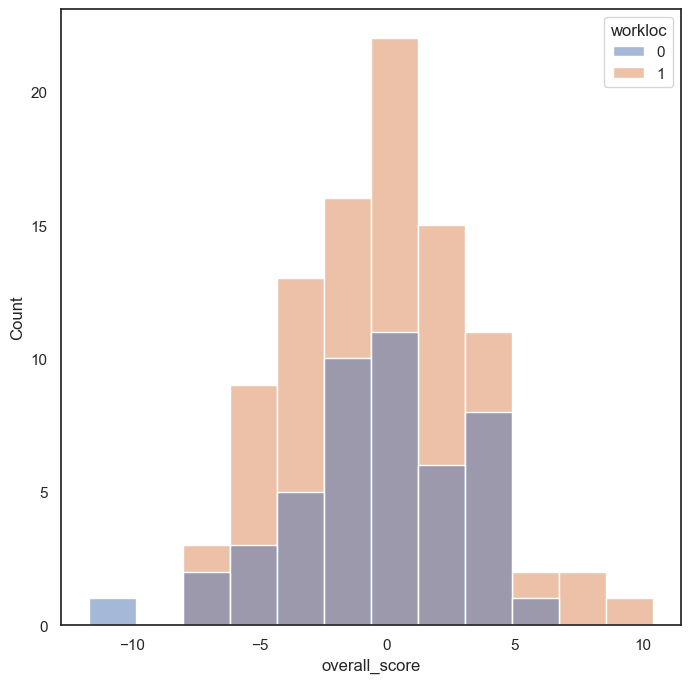

In [ ]:
sns.histplot(data=data, x='overall_score', hue='workloc')

<function matplotlib.pyplot.show(close=None, block=None)>

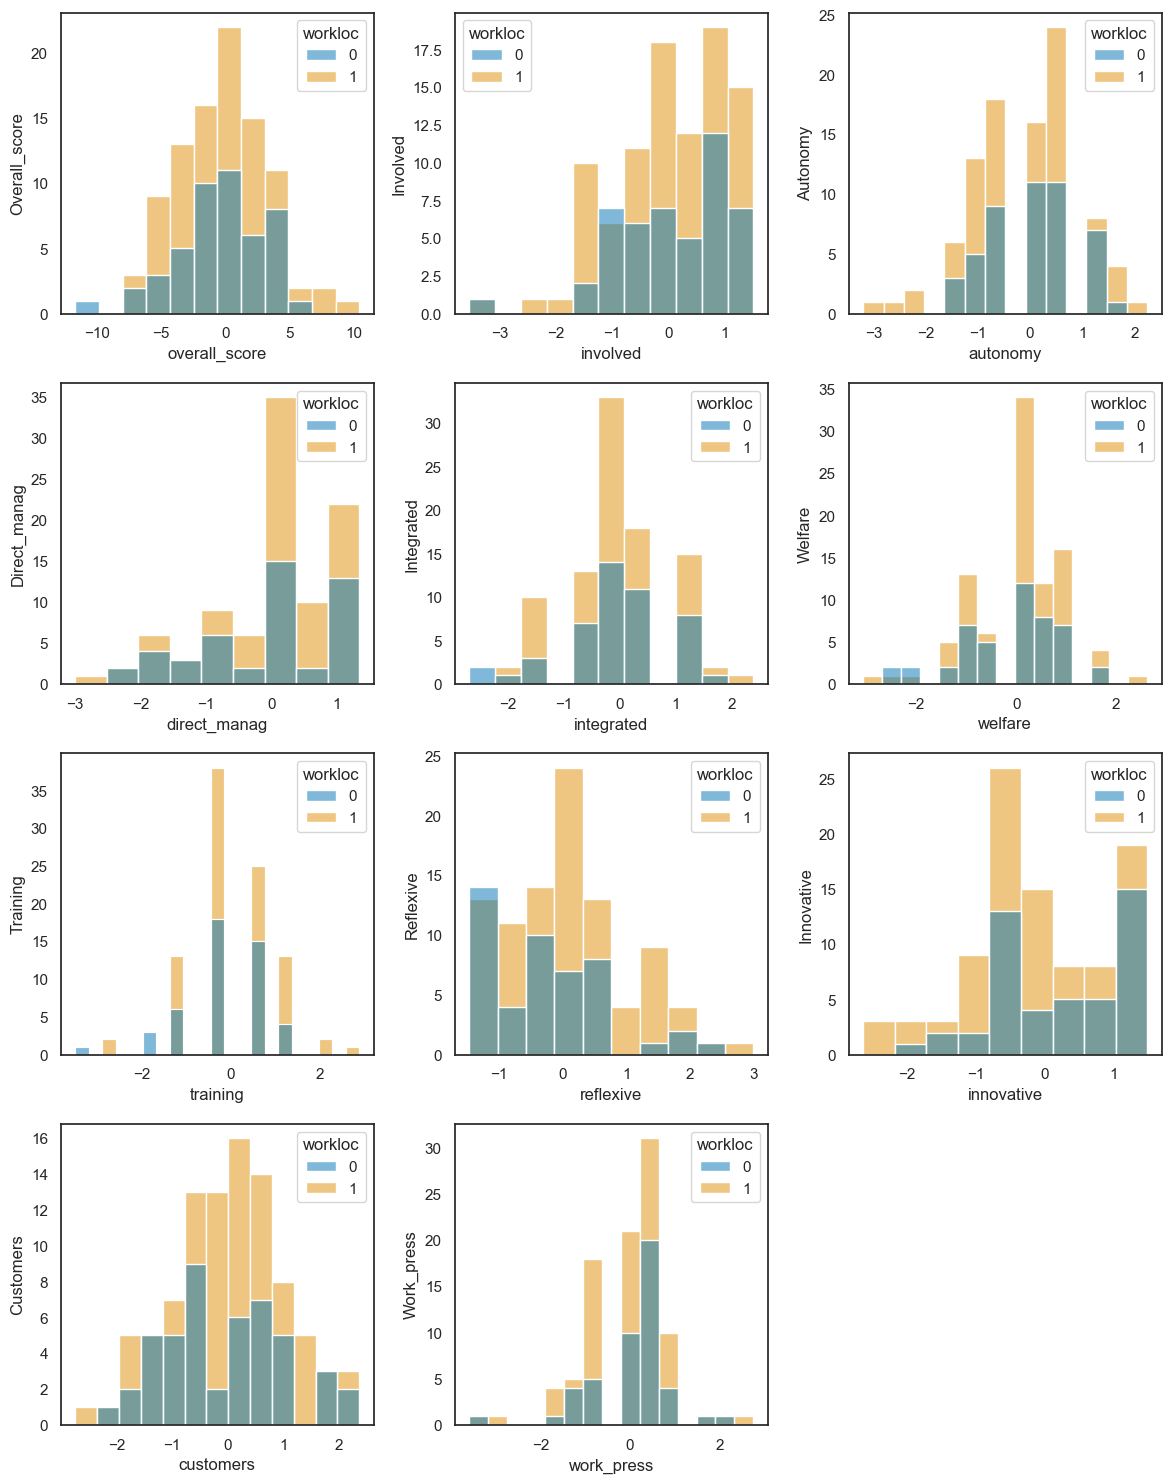

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(12,15))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# List of focal areas to create subplots for
focal_areas = ['overall_score', 'involved', 'autonomy',
       'direct_manag', 'integrated', 'welfare', 'training', 'reflexive',
       'innovative', 'customers', 'work_press']

# Iterate over the subplots and create a boxplot for each
for i, focal_area in enumerate(focal_areas):
    sns.histplot(data=data, x=focal_area, hue='workloc', 
                palette='colorblind', ax=axes[i])
    #axes[i].set_xlabel('Work location')
    axes[i].set_ylabel(focal_area.capitalize())
    
# Remove any extra subplots if the number of focal is less than 12
if len(focal_areas) < 12:
    for j in range(len(focal_areas), 12):
        fig.delaxes(axes[j])
        
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show

In [ ]:
df_tree

workloc  workleng  manag_resp  involved  autonomy  direct_manag  \
1          0         3           0 -1.017589  0.613432      1.053927   
2          0         3           0  1.510066  0.613432     -2.419751   
3          0         3           0  1.088790 -0.475410     -1.551332   
4          1         3           0 -0.596313 -1.564251     -0.393439   
5          1         3           1  0.246239  0.613432      1.053927   
..       ...       ...         ...       ...       ...           ...   
137        0        18           0 -3.545243 -1.019830     -0.103966   
138        1        18           0 -1.438864  0.613432     -2.419751   
139        0        18           1  1.510066  0.069011     -0.393439   
140        0        23           0 -0.175037  1.157852      1.343400   
141        1        23           1 -1.017589  0.613432     -0.103966   

     integrated   welfare  training  work_press  reflexive  innovative  \
1     -0.147223  1.073410 -1.106388   -0.705966   2.004760   -1.880934   
2      0.486283  0.040025 -0.308890    1.598567  -1.466898    0.744976   
3     -0.780730 -1.510051 -1.106388   -0.129833  -1.218922    1.120106   
4     -0.147223  0.040025  0.488608   -0.129833   0.268931    0.744976   
5      0.486283  0.556717 -0.308890   -0.705966  -0.474995   -1.880934   
..          ...       ...       ...         ...        ...         ...   
137    0.486283 -0.993359  0.488608    0.446301  -1.218922   -0.380414   
138   -1.414237 -0.993359  0.488608    0.446301  -0.227020   -0.380414   
139    0.486283 -1.510051 -0.308890   -0.129833  -1.218922    1.120106   
140    0.486283  0.556717 -0.308890   -0.705966  -0.722971    1.120106   
141    1.119790  0.040025 -1.106388    0.446301   0.268931   -0.005284   

     customers  overall_score  intent_quit  sentiment    overall_hue  
1    -1.645745          -1.76            1          3   2-medium_low  
2     2.370901           3.17            1          2         4-high  
3    -0.550296          -5.11            1          3          1-low  
4    -1.280595          -2.57            2          2          1-low  
5    -0.550296          -0.96            2          2   2-medium_low  
..         ...            ...          ...        ...            ...  
137   0.910302          -4.93            3          1          1-low  
138   0.910302          -4.42            3          1          1-low  
139   1.640602           1.26            3          1  3-medium_high  
140   0.545153           3.30            3          1         4-high  
141   0.545153           0.80            3          1  3-medium_high  

[141 rows x 17 columns]

## 2. Specify, split and fit the model

## Model 3a: Individual factors (autonomy, welfare, 

## training, work_press, and overall_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X is your feature matrix and y is the corresponding labels
X3 = df_tree[['autonomy', 'welfare', 'training', 'work_press', 'overall_score']]
y3 = df_tree['workloc']

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X3_train, X3_test,  y3_train, y3_test = train_test_split(X3, y3,
                                                    train_size=0.8,
                                                    random_state=1234)

In [ ]:
# Import the DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

# Train the model
clf.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the test data set.
y_pred = clf.predict(X3_test)

In [ ]:
print(X3_train.shape)
print(X3_test.shape)

(112, 5)
(29, 5)


## 3. Evaluate the classification tree

In [ ]:
print( f'R2 (train): {clf.score(X3_train, y3_train)}')
print( f'R2 (test): {clf.score(X3_test, y3_test)}')

R2 (train): 1.0
R2 (test): 0.5862068965517241


## 4. Visualise the classification tree

In [ ]:
# Visualise the classification decision tree - work location

# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(clf,
               feature_names=X3_train.columns,
               class_names=['Office', 'Remote'],
               filled=True,
               rounded=True)

# View the plot.
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['autonomy', 'welfare', 'training', 'work_press', 'overall_score'], dtype='object') instead.

<Figure size 1500x800 with 0 Axes>

In [ ]:
# get importance of each feature
importance = clf.feature_importances_
print(importance)

# Visualise the importance scores
feature_importance = pd.Series(importance, index = X3_train.columns)
feature_importance.sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Importance')

## 5. Prune the Classification Tree
This time we will apply pre-prunning technique.

In [ ]:
print( f'R2 (train): {clf.score(X3_train, y3_train)}')
print( f'R2 (test): {clf.score(X3_test, y3_test)}')

> the model is overfitting


In [ ]:
X3_train.columns

In [ ]:
# Define metrics for how we want the tree to grow
grid = {'max_depth': [2, 3, 4, 5], #the maximum depth of the decision tree
       'min_samples_split': [2, 3, 4], #the minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 3, 4, 5, 6] # the minimum number of samples required to be at a leaf node
       }

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator = classifier, param_grid=grid)
gcv.fit(X3_train, y3_train)

In [ ]:
clf_ = gcv.best_estimator_
clf_.fit(X3_train, y3_train)

In [ ]:
clf_.score(X3_train, y3_train)

In [ ]:
clf_.score(X3_test, y3_test)

In [ ]:
# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(clf_,
               feature_names=X3_train.columns,
               class_names=['Office', 'Remote'],
               filled=True,
               rounded=True)
plt.title('Model 3a', size=20)
# View the plot.
plt.show()

In [ ]:
# get importance of each feature
importance = clf_.feature_importances_
print(importance)

# Visualise the importance scores
feature_importance = pd.Series(importance, index = X3_train.columns)
feature_importance.sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Importance')

 ## Specify the model 4: Classification Decision Tree predicting on-site or remote staff by individual factors ('reflexive', 'innovative')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X is your feature matrix and y is the corresponding labels
X4 = df_tree[['reflexive', 'innovative', 'overall_score']]
y4 = df_tree['workloc']

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X4_train, X4_test,  y4_train, y4_test = train_test_split(X4, y4,
                                                    train_size=0.8,
                                                    random_state=1234)

In [ ]:
# Import the DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion='gini')#, max_depth=3)

# Train the model
clf2.fit(X4_train, y4_train)

In [ ]:
# Predict on the test data set.
y4_pred = clf2.predict(X4_test)

In [ ]:
print( f'R2 (train): {clf2.score(X4_train, y4_train)}')
print( f'R2 (test): {clf2.score(X4_test, y4_test)}')

In [ ]:
# Visualise the classification decision tree - work location

# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(clf2,
               feature_names=X4_train.columns,
               class_names=['Office', 'Remote'],
               filled=True,
               rounded=True)

# View the plot.
plt.show()

In [ ]:
# Import graphviz and display.
import graphviz
from IPython.display import display

# Create the plot.
dot_data2 = tree.export_graphviz(clf2,
                     feature_names = list(X4_train.columns),
                    class_names=['Office', 'Remote'],
                     max_depth=4,
                     filled = True)

# View the plot.
display(graphviz.Source(dot_data2))

# Create and display the graph
#graph = graphviz.Source(dot_data)
#graph.render('tree', format='png', view=True)

In [ ]:
# Import accuracy_score.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model.
print("Accuracy:",
      accuracy_score(y4_test, y4_pred))

print("\nConfusion Matrix:\n",
      confusion_matrix(y4_test, y4_pred))

print("\nClassification Report:\n",
      classification_report(y4_test, y4_pred))

## 5. Prune the Classification Tree
This time we will apply pre-prunning technique.

In [ ]:
print( f'R2 (train): {clf2.score(X4_train, y4_train)}')
print( f'R2 (test): {clf2.score(X4_test, y4_test)}')

> the model is overfitting


In [ ]:
grid = {'max_depth': [2, 3, 4, 5], #the maximum depth of the decision tree
       'min_samples_split': [2, 3, 4], #the minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 3, 4, 5, 6] # the minimum number of samples required to be at a leaf node
       }

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator = classifier, param_grid=grid)
gcv.fit(X4_train, y4_train)

In [ ]:
clf_2 = gcv.best_estimator_
clf_2.fit(X4_train, y4_train)

In [ ]:
# Import accuracy_score.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model.
print("Accuracy:",
      accuracy_score(y4_test, y4_pred))

print("\nConfusion Matrix:\n",
      confusion_matrix(y4_test, y4_pred))

print("\nClassification Report:\n",
      classification_report(y4_test, y4_pred))

In [ ]:
print(clf_2.score(X4_train, y4_train))

In [ ]:
clf_2.score(X4_test, y4_test)

In [ ]:
# Import the tree module.
from sklearn import tree

# Plot the tree.
plt.figure(figsize=(15, 8))

tree.plot_tree(clf_2,
               feature_names=X4_train.columns,
               class_names=['Office', 'Remote'],
               filled=True,
               rounded=True)
plt.title('Model 3b - External factors')
# View the plot.
plt.show()

In [ ]:
# get importance of each feature
importance = clf_2.feature_importances_
print(importance)

# Visualise the importance scores
feature_importance = pd.Series(importance, index = X4_train.columns)
feature_importance.sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Importance')
plt.title('Model 3b - External factors')

# 3. Sentiment Analysis
We will explore the textual responses to derive further insights into how employees feel about the organisation.

Sentiment analysis include the following step:
1. import and prepare the data
2. preprocessing textual data
3. visualise the most frequently used words
4. tokenisation
5. frequency distribution of words
6. review polarity and sentiment
7. extract contextualised comments
8. identify named entities
9. generate a document-term matrix
10. evaluate the sentiment analysis.

## 1. Import and prepare the data


### a) Import the data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the data set
ec = pd.read_csv('Data\employee_comments.csv')

# View the data
print(ec.shape)
ec.head(20)

### b) Prepare the data


### Drop unnecessary columns


In [ ]:
# Drop all the columns except comments
ec.drop(columns=['ID'],
       axis=1,
       inplace=True)

# rename the comment column to a shorter name
ec.rename(columns={
    'What led to how you feel about working at ServiceFirst? Please type into the box below. Describe an event at work and how it affected your thoughts and feelings.': 'Comments'},
         inplace=True)

# View the DataFrame
print(ec.shape)
ec.head()

### Determine and remove missing values


In [ ]:
# Determine missing values
ec.isnull().sum()

In [ ]:
# Remove missing values
ec2 = ec.dropna()

# View DataFrame
ec2.shape

In [ ]:
# Check the data again for missing values
ec2.isnull().sum()

In [ ]:
ec2

## 2. Pre-process the data


### a) Change all the words in the `Comments` to lower case


In [ ]:
# Transform data to lowercase
ec2['Comments'] = ec2['Comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result
ec2['Comments'].head()

## b) Remove punctuation


In [ ]:
# Remove punctuation
ec2['Comments'] = ec2['Comments'].str.replace('[^\w\s]',' ')

# Preview the result
ec2['Comments'].head()

## c) Drop duplicates from the `Comments` column


In [ ]:
# Check the number of duplicate values in the `Comments` colum
ec2.Comments.duplicated().sum()

In [ ]:
ec2[ec2.Comments.duplicated()]

In [ ]:
# Drop duplicates
comments = ec2.drop_duplicates(subset=['Comments'])

# Reset the index
comments.reset_index(inplace=True)

# Preview the data
print(comments.shape)
comments.head()

In [ ]:
# Check the numer of duplicate values in the Comments column 
comments[comments.Comments.duplicated()]

## d) Save the output as a CSV file


In [ ]:
# Save the output as a CSV file
comments.to_csv('comments.csv')

# Import DataFrame to sense-check
comments2 = pd.read_csv('comments.csv')

# View the DataFrame
comments2.head()

## 3. Visualise the most frequently used words

In [ ]:
# String all the comments together in a single variable
# Create an empty string variable
all_comments = ' '
for i in range(comments.shape[0]):
    # Add each comment
    all_comments = all_comments + comments['Comments'][i]

In [ ]:
# You might need to install WordCloud.
!pip install WordCloud

In [ ]:
pip install --upgrade pip

In [ ]:
pip install --upgrade Pillow

In [ ]:
# Import along with Matplotlin and Seaborn for visualisation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Set the colous palette
sns.set(color_codes=True)

# Create a WordCloud object
word_cloud = WordCloud(width = 900,
                      height = 900,
                      background_color='white',
                      min_font_size=10).generate(all_comments)

# Plot the WordCloud image
plt.figure(figsize = (8, 8),
          facecolor=None)

plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#plt.savefig('comments_1.png')

In [ ]:
# Import along with Matplotlib and Seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 900,
                       height = 900,
                       background_color ='white',
                       colormap = 'plasma', 
                       stopwords = 'none',
                       min_font_size = 10).generate(all_comments) 

# Plot the WordCloud image.                    
plt.figure(figsize = (8, 8),
           facecolor = None) 

plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#plt.savefig('comments_2.png')

# 4. Find the most frequently used words with tokenisation


## a) Tokenisation



In [ ]:
# Install the Natural Language Tool Kit "nltk" library with !pip.
!pip install nltk

In [ ]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
# Tokenise the words.
comments['tokens'] = comments['Comments'].apply(word_tokenize)

# Preview data.
print(comments.shape)
comments['tokens'].head()

In [ ]:
# Combine all the token into a single list of words.

# Define an empty list of tokens
all_tokens = [ ]

for i in range(comments.shape[0]): #retrive the first element of the tuple which represents the number of rows in the dataframe
    # Add each token to the list
    all_tokens = all_tokens + comments['tokens'][i]

In [ ]:
# Import the FredDist class
from nltk.probability import FreqDist

# Calculate the frequency distribution
fdist = FreqDist(all_tokens)

# Preview data
fdist

In [ ]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.)
tokens1 = [word for word in all_tokens if word.isalnum()]

# View the output
tokens1

## b) Eliminate stopwords


In [ ]:
# Download the stopword list
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define and empty string variable
tokens2_string = ' '

for value in tokens2:
    # Add each filtered token word to the string
    tokens2_string = tokens2_string + value + ' '
    
# View the output
tokens2_string


## c) Visualise the tokens of relevance in a word cloud


In [ ]:
# Set the colour pallete
sns.set(color_codes=True)

# Create a WordCloud
wordcloud = WordCloud(width = 900,
                     height = 900,
                     background_color='white',
                     colormap='plasma',
                     min_font_size=10).generate(tokens2_string)

# Plot the WordCloud image
plt.figure(figsize = (8, 8),
           facecolor = None)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Save the wordcloud as a png file
plt.savefig('comments_3.png')

Create another word cloud with the parameter `stopwords='none'`, and comment out the `colormap='plasma'`. Remember to save the image as PNG files for the reflection section

In [ ]:
# Create a WordCloud
wordcloud = WordCloud(width = 900,
                     height = 900,
                     background_color='white',
                     #colormap='plasma',
                      stopwords='none',
                     min_font_size=10).generate(tokens2_string)

# Plot the WordCloud image
plt.figure(figsize = (8, 8),
           facecolor = None)

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Save the wordcloud as a png file
plt.savefig('comments_4.png')

## 5. Frequency distribution of words


In [ ]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

In [ ]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(20),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

In [ ]:
# Save the output as a CSV file.
counts.to_csv('ec_counts.csv')

# Import DataFrame to sense-check.
counts2 = pd.read_csv('ec_counts.csv')

# View the DataFrame.
counts2.head()

In [ ]:
# Set the plot type.
ax = counts.plot(kind='barh',
                 figsize=(8, 8),
                 fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Employee texual responses: Count of the 20 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# Save the plot as a png file.
#plt.savefig('ec_frequent_words.png')

## 6. Review polarity and sentiment


In [ ]:
# Install TextBlob.
!pip install textblob

In [ ]:
# Import the necessary package.
from textblob import TextBlob

########

# Example 1:
print(TextBlob("No Comment").sentiment)

# Example 2:
print(TextBlob("A close colleague recently experienced some issues outside of work which impacted slightly on their role. Line management and senior management showed great care and diplomacy in handling the issue, which made me feel confident that employees are valued as people as well as staff.").sentiment)

# Example 3:
print(TextBlob("What I dislike and find most frustrating about my place of work is the petty infighting between different managers. Most of the time we are asked to chase customers for information which is for internal use only and as well as being inconvenience for customers it is not required for audit purpose. Over the last few years instead of cutting down on paperwork which I thought was the main goal more rules have been added making longer for work to be processed.Also there appears to be a two tier system in the company with different rules for certain individuals leading to a sense of resentment among staff.").sentiment)

In [ ]:
# Define a function to extract a polarity score for the comment
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment
comments['polarity'] = comments['Comments'].apply(generate_polarity)

# Preview the result
comments['polarity'].head()

In [ ]:
# Define a function to extract a subjectivity score for the comment
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity score for the comment
comments['subjectivity'] = comments['Comments'].apply(generate_subjectivity)

# Preview the result
comments['subjectivity'].head()

In [ ]:
# Save the output as a CSV file
comments.to_csv('comments2.csv')

# Import DataFrame to sense-check
comments2 = pd.read_csv('comments2.csv')

# View the DataFrame
comments2.head()

In [ ]:
# Create a histogram

# Set the number of bins
num_bins = 50

# Set the plot area
plt.figure(figsize=(8, 8))

# Define the bars
n, bins, patches = plt.hist(comments['polarity'],
                           num_bins,
                           facecolor='blue')

# Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

# Save the plot as png file
#plt.savefig('polarity.png')

In [ ]:
# Create a histogram for subjectivity

# Set the number of bins
num_bins = 50

# Set the plot area
plt.figure(figsize=(8, 8))

# Define the bars
n, bins, patches = plt.hist(comments['subjectivity'],
                           num_bins,
                           facecolor='green')

# Set the labels
plt.xlabel('subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show()

# Save the plt as png file
#plt.savefig('subjectivity.png')

In [ ]:
# Combine the two histograms onto one plot for comparison.
x = comments['polarity']
y = comments['subjectivity']

# Specify histograms.
plt.hist(x,
         bins,
         color='blue',
         alpha=0.5,
         label='x')

plt.hist(y,
         bins,
         color='green',
         alpha=0.5,
         label='y')

# Set the labels.
plt.xlabel('Polarity and subjectivity',
           fontsize=12)
plt.ylabel('Count',
           fontsize=12)
plt.title('Histogram of sentiment score polarity and subjectivity',
          fontsize=20)

labels = {'Polarity', 'Subjectivity'}
plt.legend(loc='upper right', labels=labels)
plt.show()

# Save the plot as a png file.
#plt.savefig('polarity_and_subjectivity.png')

## 7. Extract contextualised comments


### Positive polarity


In [ ]:
# Create a DataFrame with top 20 positive comments.
positive_sentiment = comments.nlargest(20,
                                     'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['Comments',
                                         'polarity',
                                         'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['Comments'],
                                        **{'width': '1500px'})

# Save the output as a CSV file.
positive_sentiment.to_csv('positive_sentiment.csv')

# View shape of DataFrame.
print(positive_sentiment.shape)
positive_sentiment.head(20)

In [ ]:
positive_sentiment.at[67, 'Comments']

### Negative polarity

In [ ]:
# Create a DataFrame with top 20 negative comments.
negative_sentiment = comments.nsmallest(20,
                                      'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['Comments',
                                         'polarity',
                                         'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['Comments'], 
                                        **{'width': '1500px'})

# Save the output as a CSV file.
negative_sentiment.to_csv('negative_sentiment.csv')

# View shape of DataFrame.
print(negative_sentiment.shape)
negative_sentiment.head(20)

In [ ]:
# View one comment.
negative_sentiment.loc[10, 'Comments']

## 8. Identify named entities

*Ensure the installation is done before you proceed to the next code block.*

In [ ]:
!pip install -U pip
!pip install -U setuptools
!pip install -U wheel

In [ ]:
# Install spaCy for Windows and macOS.
!pip install -U pip setuptools wheel

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
pip install --upgrade dataclasses


In [ ]:
# Import the spaCy library.
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

comments['named_entities'] = comments['Comments'].apply(generate_named_entities)

# View the output.
comments.head()

In [ ]:
from spacy import displacy

# Iterate through a section of comments. Specify the index of comments
for i in range(10, 20):
    # Check whether the corresponding comment has a named entity
    if comments['named_entities'][i]:
        # Highlight the entity in the comment
        displacy.render(nlp(comments['Comments'][i]),
                           style='ent',
                           jupyter=True)

## 9. Generate a document-term matrix


### a) Prepare the comments


In [ ]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1, 1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(comments['Comments'])

### b) Set the parameters


In [ ]:
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names_out()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:20] 

# Display the results.
document_term_matrix.drop(columns=['total_count']).head(10)

In [ ]:
# Save as CSV file for further analysis/research.
document_term_matrix.to_csv('dtm.csv')

# Import DataFrame to sense-check.
dtm = pd.read_csv('dtm.csv')

# View the DataFrame.
dtm.head()

### c) Identify frequently used words

In [ ]:
# Set the plot type.
ax2 = document_term_matrix['total_count'].plot(kind='barh',
                                              figsize=(8, 8),
                                              fontsize=12,
                                              colormap ='plasma')

# Set the labels.
ax2.set_xlabel('Count', fontsize=12)
ax2.set_ylabel('Word', fontsize=12)
ax2.set_title("Document-term matrix derived from bag-of-words model",
             fontsize=16)

# Draw the bar labels.
for i in ax2.patches:
    ax2.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
             fontsize=12, color='red')
    
# Save the plot as a png file.
#plt.savefig('dtm.png')

## 10. Evaluate the sentiment analysis

Please refer to the report.